<a href="https://colab.research.google.com/github/nguyenkhoi6394/500cities/blob/main/Final_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project from Group 1 R Notebook
Haojing Wang<br>
Khoi Nguyen<br>
Yuting Hou<br>
Yuxin Weng<br>
Yuanzhe Xu<br>

In [ ]:
version # make sure it says language R at the bottom!

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.3                         
year           2020                        
month          10                          
day            10                          
svn rev        79318                       
language       R                           
version.string R version 4.0.3 (2020-10-10)
nickname       Bunny-Wunnies Freak Out     

 # **External Data and Joining**

In [3]:
#Load 500 cities data
urlfile='https://raw.githubusercontent.com/nguyenkhoi6394/500cities/main/500Cities_cleandata_ReadyForEDA.csv'

df <- read.csv(url(urlfile))
head(df,10)

,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,⋯,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,CA,Folsom,624638,72203,7.5,16.9,21.8,25.7,64.8,5.8,⋯,14.3,80.4,9.9,23.8,84.3,8.9,33.9,1.9,6.8,"(38.67504943280, -121.147605753)"
2,FL,Largo,1239425,77648,19.6,30.6,16.9,36.1,81.0,9.0,⋯,31.0,75.7,13.1,28.3,77.1,15.4,37.7,4.5,18.3,"(27.90909077340, -82.7714203383)"
3,CA,Berkeley,606000,112580,7.7,15.1,19.6,20.9,68.2,4.9,⋯,14.2,81.5,10.9,18.5,83.2,8.2,32.2,1.9,6.7,"(37.87256787650, -122.274907975)"
4,CA,Napa,650258,76915,12.3,20.7,19.2,28.1,70.2,6.5,⋯,19.8,76.7,12.0,24.0,83.9,12.0,32.7,2.8,11.2,"(38.29804246490, -122.301093331)"
5,FL,Sunrise,1269700,84439,22.8,22.8,16.3,33.3,76.7,6.5,⋯,29.5,82.5,12.7,28.1,81.3,13.3,38.1,3.7,16.2,"(26.15468783030, -80.2998411020)"
6,FL,Pembroke Pines,1255775,154750,21.4,20.8,17.1,30.3,76.3,6.3,⋯,26.4,82.7,10.9,25.7,82.2,11.6,35.8,3.1,14.1,"(26.01273875340, -80.3384522664)"
7,NJ,Trenton,3474000,84913,25.4,23.9,14.4,35.4,74.4,4.6,⋯,42.2,79.7,17.0,38.9,84.9,17.8,45.7,4.4,26.1,"(40.22372899810, -74.7639943311)"
8,CO,Pueblo,862000,106595,19.9,28.3,14.3,31.6,73.3,6.6,⋯,24.2,72.9,13.5,30.0,81.3,16.1,34.2,3.8,17.7,"(38.27339572510, -104.612001218)"
9,WI,Racine,5566000,78860,16.6,25.1,21.7,32.8,73.6,5.9,⋯,25.4,77.7,14.0,37.4,82.6,14.1,39.8,3.5,16.9,"(42.72745994940, -87.8134530240)"


In [4]:
#Load census tract data of 500 cities that has both Place FIPS and TractID
urlfile='https://raw.githubusercontent.com/nguyenkhoi6394/500cities/main/500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release.csv'
census_data<-read.csv(url(urlfile))
head(census_data)

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,⋯,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>,<dbl>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,"(30.1, 32.2)",⋯,"(83.4, 86.6)",20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
2,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,"(29.3, 31.7)",⋯,"(81.9, 85.6)",22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
3,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,"(30.2, 32.9)",⋯,"(82.3, 86.8)",19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
4,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,"(33.5, 36.4)",⋯,"(82.1, 86.5)",21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
5,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,"(34.9, 37.7)",⋯,"(82.2, 87.1)",25.5,"(23.1, 28.0)",48.3,"(46.6, 49.7)",9.0,"( 8.1, 10.0)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)"
6,AL,Birmingham,107000,1073000800,0107000-01073000800,3859,24.5,"(20.9, 28.3)",37.5,"(36.0, 39.0)",⋯,"(82.3, 87.2)",22.0,"(19.7, 24.2)",44.8,"(43.3, 46.1)",7.9,"( 7.1, 8.7)",28.4,"(20.3, 37.2)","(33.54969778900, -86.8330944744)"


In [5]:
#Load 2017 census data that contains demographic information

urlfile='https://raw.githubusercontent.com/nguyenkhoi6394/500cities/main/acs2017_census_tract_data.csv'
demo_data<-read.csv(url(urlfile))
head(demo_data,10)

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,⋯,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,⋯,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
2,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,⋯,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
3,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,⋯,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
4,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,⋯,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
5,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,⋯,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
6,1001020600,Alabama,Autauga County,3620,1765,1855,3.0,70.7,25.1,0.0,⋯,0.7,3.5,8.0,21.1,1364,84.0,14.1,1.9,0.0,6.1
7,1001020700,Alabama,Autauga County,3420,1459,1961,4.0,78.0,13.7,0.6,⋯,0.0,0.0,0.0,16.4,1418,77.4,17.6,5.0,0.0,16.9
8,1001020801,Alabama,Autauga County,2913,1495,1418,4.2,86.3,7.1,1.5,⋯,0.0,0.7,5.2,24.6,1369,72.7,17.5,8.8,1.0,7.2
9,1001020802,Alabama,Autauga County,11333,5488,5845,1.4,81.8,15.3,0.0,⋯,0.0,0.0,2.2,27.4,4857,70.1,22.5,7.4,0.0,2.2


In [ ]:
urlfile<-'https://raw.githubusercontent.com/nguyenkhoi6394/500cities/main/Hospitals_cleandata%20-%20Hospitals_cleandata.csv'
hospital_data<-read.csv(url(urlfile))
head(hospital_data,10)

,ID,NAME,CITY,STATE,TYPE,STATUS,COUNTY,OWNER,BEDS,PlaceName_Cleaned
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,76777520,HOUSTON METHODIST SAN JACINTO HOSPITAL ALEXANDER CAMPUS,BAYTOWN,TX,GENERAL ACUTE CARE,OPEN,HARRIS,NON-PROFIT,182,Baytown
2,129043230,"WOODS AT PARKSIDE,THE",COLUMBUS,OH,SPECIAL,OPEN,FRANKLIN,PROPRIETARY,50,Columbus
3,130045404,DAYTON CHILDREN'S HOSPITAL,DAYTON,OH,CHILDREN,OPEN,MONTGOMERY,NON-PROFIT,155,Dayton
4,128844512,VIBRA HOSPITAL OF MAHONING VALLEY,BOARDMAN,OH,LONG TERM CARE,OPEN,MAHONING,PROPRIETARY,45,Boardman
5,129845417,HAVEN BEHAVIORAL SENIOR CARE OF DAYTON,DAYTON,OH,PSYCHIATRIC,OPEN,MONTGOMERY,PROPRIETARY,32,Dayton
6,130774801,CHG CORNERSTONE HOSPITAL OF OKLAHOMA,SHAWNEE,OK,LONG TERM CARE,OPEN,POTTAWATOMIE,PROPRIETARY,34,Shawnee
7,131074538,MARY HURLEY HOSPITAL,COALGATE,OK,GENERAL ACUTE CARE,OPEN,COAL,NON-PROFIT,20,Coalgate
8,5258701,TRINITY HOSPITALS,MINOT,ND,GENERAL ACUTE CARE,OPEN,WARD,NON-PROFIT,251,Minot
9,10527016,LIFEBRITE COMMUNITY HOSPITAL OF STOKES,DANBURY,NC,GENERAL ACUTE CARE,OPEN,STOKES,PROPRIETARY,93,Danbury


In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# count the total numbers of hopitals in each state 
library(dplyr)
numberofhospitals =hospital_data%>%
count(PlaceName_Cleaned,sort=TRUE)
numberofhospitals

PlaceName_Cleaned,n
<chr>,<int>
Houston,61
San Antonio,44
Chicago,40
New York,39
Columbus,35
Philadelphia,35
Dallas,33
Los Angeles,33
Las Vegas,29


In [ ]:
# make a new dataset from hospital_data through adding numbers of hospitals in each state  
hospital_data2=as.data.frame(numberofhospitals)
colnames(hospital_data2)[2]='Num_Hospitals'
hospital_data2

PlaceName_Cleaned,Num_Hospitals
<chr>,<int>
Houston,61
San Antonio,44
Chicago,40
New York,39
Columbus,35
Philadelphia,35
Dallas,33
Los Angeles,33
Las Vegas,29


In [6]:
#match PlaceFIPS from 500 cities census tract data to 2017 demographic data
demo_data<-merge(demo_data,census_data[,3:4],by.x='TractId',by.y='TractFIPS')
head(demo_data,10)

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,⋯,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,PlaceFIPS
,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1073000100,Alabama,Jefferson County,3114,1605,1509,9.8,16.4,73.3,0.0,⋯,4.9,2.4,23.1,1220,89.7,3.9,2.5,3.9,10.7,107000
2,1073000300,Alabama,Jefferson County,2124,1222,902,31.5,10.9,53.2,1.7,⋯,3.1,5.3,19.7,873,94.0,5.2,0.0,0.8,13.3,107000
3,1073000400,Alabama,Jefferson County,3515,1817,1698,0.0,12.7,86.9,0.0,⋯,0.0,0.0,23.4,1200,86.8,10.1,3.2,0.0,21.2,107000
4,1073000500,Alabama,Jefferson County,3060,1376,1684,2.0,7.7,90.0,0.0,⋯,0.0,0.0,22.6,1006,85.7,6.3,8.1,0.0,21.0,107000
5,1073000700,Alabama,Jefferson County,2739,1326,1413,1.9,0.0,97.2,0.0,⋯,4.9,1.1,23.7,793,85.6,10.0,3.7,0.8,17.9,107000
6,1073000800,Alabama,Jefferson County,3071,1641,1430,1.6,1.4,97.0,0.0,⋯,5.5,0.0,20.3,1162,78.7,8.3,13.0,0.0,10.8,107000
7,1073001100,Alabama,Jefferson County,4636,1833,2803,0.0,2.0,98.0,0.0,⋯,0.0,3.1,21.3,1915,77.0,23.0,0.0,0.0,6.2,107000
8,1073001200,Alabama,Jefferson County,2803,1275,1528,6.8,0.6,92.6,0.0,⋯,1.1,0.0,20.9,1211,78.0,10.9,10.0,1.1,13.2,107000
9,1073001400,Alabama,Jefferson County,2086,1074,1012,7.2,0.9,91.4,0.1,⋯,0.0,1.1,18.9,898,76.6,19.4,4.0,0.0,10.2,107000


Since 2017 demographic data contains very detailed level of data, a PlaceFIPS may have many different census-tract data. 

Hence, we need to aggregate census-tract data at the level of PlaceFIPS to match with 500 cities data.

In order to get aggregate data, we calculate using weighted average on population.

For example:

PlaceFIPS of 100200 has 2 census-tracts: <br>
A has population of 400 and the income per capita is $\$500$ <br>
B has population of 600 and the income per capita is $\$200$

The average Income per capita for 100200 is: <br>
(400$*$500+200$*$600)/1000= $\$320$


In [7]:
to_agg<-c('Hispanic','White','Black','IncomePerCap') #these are the features we incorporate into 500 cities data
col_list<-c() 
for (i in to_agg) 
                {col_name<-paste(i,'multiply')
                 demo_data[col_name]<-demo_data[i]*demo_data$TotalPop #this is to calculate the numerator
                 col_list<-c(col_list,col_name)
                 }
head(demo_data,20)

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,⋯,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,PlaceFIPS,Hispanic multiply,White multiply,Black multiply,IncomePerCap multiply
,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1073000100,Alabama,Jefferson County,3114,1605,1509,9.8,16.4,73.3,0.0,⋯,89.7,3.9,2.5,3.9,10.7,107000,30517.2,51069.6,228256.2,46582326
2,1073000300,Alabama,Jefferson County,2124,1222,902,31.5,10.9,53.2,1.7,⋯,94.0,5.2,0.0,0.8,13.3,107000,66906.0,23151.6,112996.8,30332844
3,1073000400,Alabama,Jefferson County,3515,1817,1698,0.0,12.7,86.9,0.0,⋯,86.8,10.1,3.2,0.0,21.2,107000,0.0,44640.5,305453.5,56517685
4,1073000500,Alabama,Jefferson County,3060,1376,1684,2.0,7.7,90.0,0.0,⋯,85.7,6.3,8.1,0.0,21.0,107000,6120.0,23562.0,275400.0,42925680
5,1073000700,Alabama,Jefferson County,2739,1326,1413,1.9,0.0,97.2,0.0,⋯,85.6,10.0,3.7,0.8,17.9,107000,5204.1,0.0,266230.8,27877542
6,1073000800,Alabama,Jefferson County,3071,1641,1430,1.6,1.4,97.0,0.0,⋯,78.7,8.3,13.0,0.0,10.8,107000,4913.6,4299.4,297887.0,46663845
7,1073001100,Alabama,Jefferson County,4636,1833,2803,0.0,2.0,98.0,0.0,⋯,77.0,23.0,0.0,0.0,6.2,107000,0.0,9272.0,454328.0,100429668
8,1073001200,Alabama,Jefferson County,2803,1275,1528,6.8,0.6,92.6,0.0,⋯,78.0,10.9,10.0,1.1,13.2,107000,19060.4,1681.8,259557.8,50863238
9,1073001400,Alabama,Jefferson County,2086,1074,1012,7.2,0.9,91.4,0.1,⋯,76.6,19.4,4.0,0.0,10.2,107000,15019.2,1877.4,190660.4,40779214


In [8]:
name<-data.frame(col_list,to_agg) #store the name of used features
name

col_list,to_agg
<chr>,<chr>
Hispanic multiply,Hispanic
White multiply,White
Black multiply,Black
IncomePerCap multiply,IncomePerCap


In [9]:
byplace<-aggregate(demo_data[,c(which(colnames(demo_data)=='TotalPop'),39:42)],by=list(demo_data$PlaceFIPS),sum)
#group by data by PlaceFIPS
colnames(byplace)[1]='PlaceFIPS'

#get the average by dividing the numerator by the denominator, which is TotalPop of each PlaceFIPS
for (i in seq_len(nrow(name))){
                     col_name<-name[i,'to_agg']
                     byplace[col_name]<-byplace[name[i,'col_list']]/byplace$TotalPop
                      }

byplace
           

PlaceFIPS,TotalPop,Hispanic multiply,White multiply,Black multiply,IncomePerCap multiply,Hispanic,White,Black,IncomePerCap
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15003,990035,9506189.0,18537228.4,2157822.8,NA,9.601872,18.723811,2.179542,NA
107000,329751,1208685.2,11883861.6,18945627.2,9301484712,3.665448,36.038895,57.454343,28207.60
135896,158362,698399.2,11324862.4,2717994.7,6723879468,4.410144,71.512499,17.163175,42458.92
137000,264221,1381402.3,16527293.3,7028555.5,8759025571,5.228208,62.551021,26.601048,33150.38
150000,238523,669552.4,11643496.4,10614438.3,6059173816,2.807077,48.814984,44.500691,25402.89
151000,216347,749277.2,7386512.7,12547622.9,5697258122,3.463312,34.141970,57.997675,26333.89
177256,135337,482521.0,7441283.4,5151477.3,3261990148,3.565330,54.983363,38.064072,24102.72
203000,298225,2642985.3,17652088.6,1567073.4,11623951539,8.862387,59.190506,5.254668,38977.12
404720,90288,4566565.9,2986836.4,870643.0,2004285725,50.577772,33.081211,9.642954,22198.81


In [ ]:
#merge the used features into 500 cities data
df2<-merge(df,byplace[,c(1:2,7:10)],by='PlaceFIPS')
head(df2,10)

,PlaceFIPS,StateAbbr,PlaceName,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,⋯,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation,TotalPop,Hispanic,White,Black,IncomePerCap
,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,15003,HI,Honolulu,953207,10.1,20.0,17.7,31.5,75.4,5.5,⋯,9.4,46.9,2.5,6.8,"(21.45880393050, -157.973296737)",990035,9.601872,18.72381,2.179542,NA
2,107000,AL,Birmingham,212237,19.2,29.3,13.2,43.8,81.3,5.6,⋯,16.3,41.5,5.0,22.8,"(33.52756637730, -86.7988174678)",329751,3.665448,36.03889,57.454343,28207.60
3,135896,AL,Hoover,81619,10.3,24.0,17.8,30.7,77.7,6.6,⋯,9.9,32.9,2.2,8.3,"(33.37676027290, -86.8051937568)",158362,4.410144,71.51250,17.163175,42458.92
4,137000,AL,Huntsville,180105,15.3,29.2,14.1,36.8,79.0,6.4,⋯,13.2,37.8,3.4,14.2,"(34.69896926710, -86.6387042882)",264221,5.228208,62.55102,26.601048,33150.38
5,150000,AL,Mobile,195111,17.0,32.1,14.7,42.0,79.3,6.3,⋯,15.7,39.1,4.5,19.7,"(30.67762486480, -88.1184482714)",238523,2.807077,48.81498,44.500691,25402.89
6,151000,AL,Montgomery,205764,17.9,29.4,15.1,40.3,78.9,5.9,⋯,14.5,38.0,4.2,18.1,"(32.34726453330, -86.2677059552)",216347,3.463312,34.14197,57.997675,26333.89
7,177256,AL,Tuscaloosa,90468,16.4,24.1,17.2,32.6,73.6,4.6,⋯,13.1,39.0,3.1,18.9,"(33.23360839510, -87.5268004073)",135337,3.565330,54.98336,38.064072,24102.72
8,203000,AK,Anchorage,291826,12.5,19.8,19.4,26.8,63.7,5.1,⋯,10.6,31.3,2.3,12.9,"(61.14986873100, -149.111113424)",298225,8.862387,59.19051,5.254668,38977.12
9,404720,AZ,Avondale,76238,19.3,19.2,17.7,24.8,65.9,4.1,⋯,12.4,38.1,2.4,14.7,"(33.38583674050, -112.323626619)",90288,50.577772,33.08121,9.642954,22198.81


In [ ]:
dim(df2)

[1] 500  38

In [ ]:
#merge hopital_data2 into 500 citites combined demographics data
df3=merge(df2,hospital_data2,by.x='PlaceName',by.y='PlaceName_Cleaned',all.x=T)
head(df3,10)

,PlaceName,PlaceFIPS,StateAbbr,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,⋯,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation,TotalPop,Hispanic,White,Black,IncomePerCap,Num_Hospitals
,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Abilene,4801000,TX,117063,22.6,23.6,17.9,30.3,75.0,5.8,⋯,33.2,3.2,15.7,"(32.45465108980, -99.7383043723)",130741,25.866044,60.121836,9.395042,23502.72,6
2,Akron,3901000,OH,199110,12.3,29.1,15.4,36.5,78.4,6.1,⋯,42.9,4.2,21.6,"(41.08014449420, -81.5219213688)",232863,2.200903,63.309527,26.831555,23724.44,7
3,Alameda,600562,CA,73812,7.3,18.7,17.4,25.8,72.6,6.1,⋯,33.7,2.3,7.5,"(37.76508490310, -122.266489842)",78246,11.549796,42.728373,7.327967,47229.34,4
4,Albany,3601000,NY,97856,11.0,22.9,18.5,28.9,72.8,5.3,⋯,37.7,3.0,14.5,"(42.66639696040, -73.7986826267)",98498,9.743970,50.597415,27.235942,27632.45,11
5,Albany,1301052,GA,77434,24.2,26.6,12.6,42.6,76.6,5.5,⋯,47.1,5.0,25.2,"(31.57760367660, -84.1763240815)",87325,2.562716,24.665562,70.041324,20101.05,11
6,Albuquerque,3502000,NM,545852,12.2,24.8,15.4,26.5,71.0,5.8,⋯,32.3,2.9,12.5,"(35.10550257710, -106.647447696)",614055,49.170487,39.518942,2.684335,28356.38,17
7,Alexandria,5101000,VA,139966,12.0,18.4,19.2,26.1,73.3,5.1,⋯,31.9,2.0,9.0,"(38.81873515570, -77.0867762661)",154710,16.729142,51.801419,21.690296,57018.61,12
8,Alhambra,600884,CA,83089,13.1,16.8,12.4,27.7,72.6,4.8,⋯,37.9,2.5,9.2,"(34.08397343830, -118.135514119)",85168,37.635699,8.602968,1.631748,27384.43,1
9,Allen,4801924,TX,84246,12.4,18.4,19.4,24.2,70.7,5.0,⋯,33.3,1.8,8.1,"(33.10870432340, -96.6735373763)",108590,10.366870,61.482575,8.982525,43033.14,2


In [ ]:
dim(df3)

[1] 500  39

In [ ]:
#check null values 
na_count <-sapply(df3, function(y) length(which(is.na(y))))
na_rate<-na_count/nrow(df)
data.frame(na_count,na_rate)

,na_count,na_rate
,<int>,<dbl>
PlaceName,0,0.000
PlaceFIPS,0,0.000
StateAbbr,0,0.000
Population2010,0,0.000
ACCESS2_CrudePrev,0,0.000
ARTHRITIS_CrudePrev,0,0.000
BINGE_CrudePrev,0,0.000
BPHIGH_CrudePrev,0,0.000
BPMED_CrudePrev,0,0.000


Since we have some missing values on variables such as "Hispanic","IncomePerCap" and "Num_Hospitals", we will impute these N/A with the mean value of each variable per state.


In [ ]:
#store columns with null value to impute
to_fill<-c("Hispanic","White","Black","IncomePerCap","Num_Hospitals")

In [ ]:

for (x in to_fill) { #function to impute missing value
                     imputeNA <- function(DF, i,col) {
                                                      sel <- DF$StateAbbr == DF$StateAbbr[i]
                                                      imputed <- mean(DF[sel,col], na.rm = TRUE) #find the mean of that feature in the same state as the city with N/A
                                                      if (is.nan(imputed)) { # careful, there might be no other match
                                                          imputed <- NA}
                                                      return(imputed)}
                      #looping through the columns to fill na
                      for (iMissing in which(is.na(df3[x]))) {
                                                       df3[iMissing,x] <- imputeNA(df3, iMissing,x)}
                      }



In [ ]:
df3$Num_Hospitals<-round(df3$Num_Hospitals)

To measure health care access in US cities, we create a new feature called Number of Hospitals per capita

In [ ]:
df3['HospitalPerCap']=df3$Num_Hospitals/df3$TotalPop

In [ ]:
#check null values again
na_count <-sapply(df3, function(y) length(which(is.na(y))))
na_rate<-na_count/nrow(df3)
data.frame(na_count,na_rate)

,na_count,na_rate
,<int>,<dbl>
PlaceName,0,0.000
PlaceFIPS,0,0.000
StateAbbr,0,0.000
Population2010,0,0.000
ACCESS2_CrudePrev,0,0.000
ARTHRITIS_CrudePrev,0,0.000
BINGE_CrudePrev,0,0.000
BPHIGH_CrudePrev,0,0.000
BPMED_CrudePrev,0,0.000


In [ ]:
#There is 1 more missing value in IncomePerCap
df3[which(is.na(df3$IncomePerCap)),]

,PlaceName,PlaceFIPS,StateAbbr,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,⋯,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation,TotalPop,Hispanic,White,Black,IncomePerCap,Num_Hospitals,HospitalPerCap
,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
189,Honolulu,15003,HI,953207,10.1,20,17.7,31.5,75.4,5.5,⋯,2.5,6.8,"(21.45880393050, -157.973296737)",990035,9.601872,18.72381,2.179542,NA,9,9.090588e-06


In [ ]:
#The missing value is from Honolulu, simply because we do not have other cities in this state to get the mean
#As a result, we will impute this value using mean of the whole USA
df3[which(is.na(df3$IncomePerCap)),which(colnames(df3)=='IncomePerCap')]<-mean(df3$IncomePerCap,na.rm=T)

To measure outcome variable across regions, we also incorporate data that contains information about state per division in the USA

In [ ]:
urlfile<-'https://raw.githubusercontent.com/nguyenkhoi6394/500cities/main/states.csv'
region_data<-read.csv(url(urlfile))
head(region_data,5)

,State,State.Code,Region,Division
,<chr>,<chr>,<chr>,<chr>
1,Alaska,AK,West,Pacific
2,Alabama,AL,South,East South Central
3,Arkansas,AR,South,West South Central
4,Arizona,AZ,West,Mountain
5,California,CA,West,Pacific


In [ ]:
final_df<-merge(df3,region_data[,c(2:4)],by.x = 'StateAbbr',by.y='State.Code',all.x=T)
head(final_df,5)

,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,⋯,Geolocation,TotalPop,Hispanic,White,Black,IncomePerCap,Num_Hospitals,HospitalPerCap,Region,Division
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,AK,Anchorage,203000,291826,12.5,19.8,19.4,26.8,63.7,5.1,⋯,"(61.14986873100, -149.111113424)",298225,8.862387,59.19051,5.254668,38977.12,9,3.017856e-05,West,Pacific
2,AL,Mobile,150000,195111,17.0,32.1,14.7,42.0,79.3,6.3,⋯,"(30.67762486480, -88.1184482714)",238523,2.807077,48.81498,44.500691,25402.89,7,2.934727e-05,South,East South Central
3,AL,Montgomery,151000,205764,17.9,29.4,15.1,40.3,78.9,5.9,⋯,"(32.34726453330, -86.2677059552)",216347,3.463312,34.14197,57.997675,26333.89,9,4.159984e-05,South,East South Central
4,AL,Huntsville,137000,180105,15.3,29.2,14.1,36.8,79.0,6.4,⋯,"(34.69896926710, -86.6387042882)",264221,5.228208,62.55102,26.601048,33150.38,7,2.649297e-05,South,East South Central
5,AL,Hoover,135896,81619,10.3,24.0,17.8,30.7,77.7,6.6,⋯,"(33.37676027290, -86.8051937568)",158362,4.410144,71.51250,17.163175,42458.92,9,5.683182e-05,South,East South Central


In [ ]:
#check null values again
na_count <-sapply(final_df, function(y) length(which(is.na(y))))
na_rate<-na_count/nrow(final_df)
data.frame(na_count,na_rate)

,na_count,na_rate
,<int>,<dbl>
StateAbbr,0,0.000
PlaceName,0,0.000
PlaceFIPS,0,0.000
Population2010,0,0.000
ACCESS2_CrudePrev,0,0.000
ARTHRITIS_CrudePrev,0,0.000
BINGE_CrudePrev,0,0.000
BPHIGH_CrudePrev,0,0.000
BPMED_CrudePrev,0,0.000


# **Exploratory Data Analysis**




**Target Variable: STROKE_CRUDEPREV**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



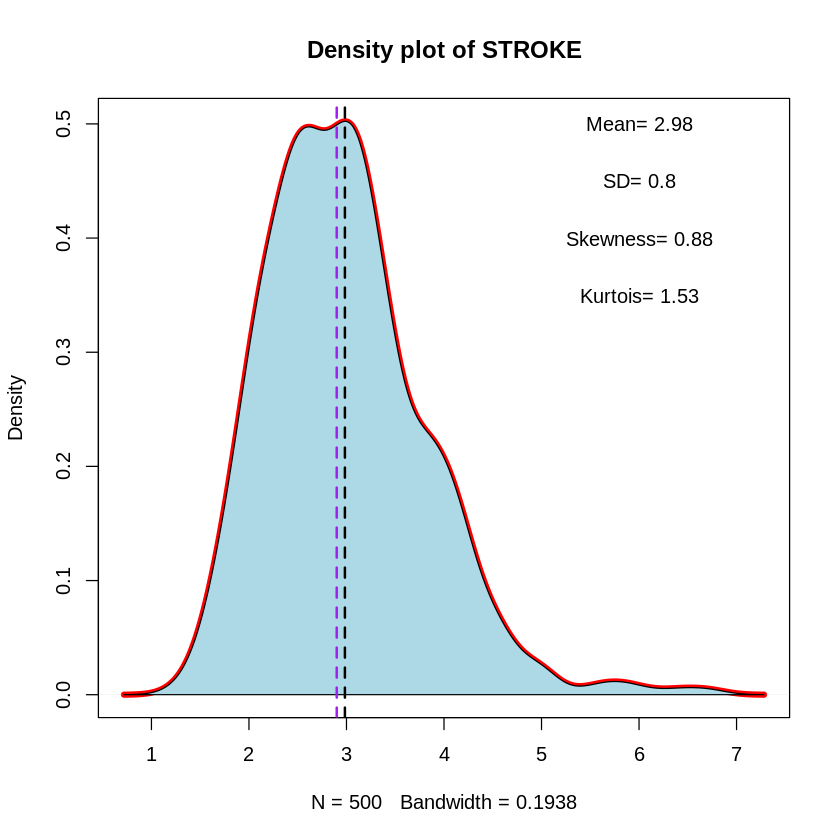

In [ ]:
#Plot distribution of target variable
plot(density(final_df$STROKE_CrudePrev),col='red',lty=1,lwd=5,main='Density plot of STROKE')
polygon(density(final_df$STROKE_CrudePrev),col='lightblue')
abline(v=mean(final_df$STROKE_CrudePrev),col='black',lwd=2,lty=2)
abline(v=median(final_df$STROKE_CrudePrev),col='purple',lwd=2,lty=2)

#Import package to calculate skewness & kurtosis
install.packages('moments')
library(moments)

text(6,0.5,paste("Mean=",round(mean(final_df$STROKE_CrudePrev),2)))
text(6,0.45,paste("SD=",round(sd(final_df$STROKE_CrudePrev),2)))
text(6,0.4,paste("Skewness=",round(skewness(final_df$STROKE_CrudePrev),2)))
text(6,0.35,paste("Kurtois=",round(kurtosis(final_df$STROKE_CrudePrev),2)))


The density plot and skewness indicate that STROKE is moderately skewed to the right. Thus we need to check normality assumption for this variable before running regression model

Next we want to look at the statistics at Regional Division level

In [ ]:
#Summary Table showing statistics of outcome variable per US division
f <- function(x) data.frame(mean = mean(x), median=median(x), sd = sd(x),size=length(x))
summary_table<-do.call(rbind, tapply(final_df$STROKE_CrudePrev, final_df$Division, f))
summary_table

,mean,median,sd,size
,<dbl>,<dbl>,<dbl>,<int>
East North Central,3.316393,3.20,1.1396169,61
East South Central,3.625000,3.55,0.8910668,16
Middle Atlantic,3.588000,3.80,0.5637080,25
Mountain,2.618000,2.70,0.4893519,50
New England,2.965517,2.90,0.6872699,29
Pacific,2.640000,2.60,0.5315596,145
South Atlantic,3.415385,3.45,0.8171978,78
West North Central,2.831250,2.70,0.6625647,32
West South Central,2.893750,3.05,0.7102146,64


It can be seen that Middle Atlantic and East South Central have highest average stroke rate.

However, we decide to re-calculate the mean Stroke rate to adjust for different population in each states/divisions. A city with only 100 people having 50% stroke rate will distort the whole region number if we simply take the average of average.

In [ ]:
final_copy<-final_df #create a new dataset so as not to make any accidental changes to the one for modeling.
final_copy['STROKE_pop']=final_copy$STROKE_CrudePrev/100*final_copy$TotalPop #We need to have the total number to calculate average at Division level
final_copy['Total_Income']=final_copy$IncomePerCap*final_copy$TotalPop


In [ ]:
summary_table<-aggregate(final_copy[,which(colnames(final_copy) %in% c('STROKE_pop','Total_Income','TotalPop','Num_Hospitals'))],by=list(final_copy$Division),FUN=sum)
summary_table$STROKE_rate<-round(summary_table$STROKE_pop/summary_table$TotalPop,4) #mean of STROKE rate at Division level
summary_table

Group.1,TotalPop,Num_Hospitals,STROKE_pop,Total_Income,STROKE_rate
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
East North Central,13478439,470,471161.4,3.830532e+11,0.0350
East South Central,4862225,183,180650.5,1.396010e+11,0.0372
Middle Atlantic,13234036,212,438103.7,3.494725e+11,0.0331
Mountain,12078908,299,327072.2,3.631690e+11,0.0271
New England,3552972,165,104669.7,1.144869e+11,0.0295
Pacific,31612411,608,832554.8,1.050212e+12,0.0263
South Atlantic,16018888,584,534599.5,4.974428e+11,0.0334
West North Central,5947966,288,173786.2,1.842369e+11,0.0292
West South Central,19308566,636,573026.8,5.626441e+11,0.0297


It can be seen that in the new adjusted number, East North Central and East South Central have highest average stroke rate. Thanksfully, there have not been any abrupt changes in the mean vs. previous means, indicating that there are not significant outliers in the stroke rate of each single city.










In [ ]:
#Summary Table showing statistics of income per cap for divisions
summary_table$IncomeperCap<-round(summary_table$Total_Income/summary_table$TotalPop)
summary_table

Group.1,TotalPop,Num_Hospitals,STROKE_pop,Total_Income,STROKE_rate,IncomeperCap
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
East North Central,13478439,470,471161.4,3.830532e+11,0.0350,28420
East South Central,4862225,183,180650.5,1.396010e+11,0.0372,28711
Middle Atlantic,13234036,212,438103.7,3.494725e+11,0.0331,26407
Mountain,12078908,299,327072.2,3.631690e+11,0.0271,30066
New England,3552972,165,104669.7,1.144869e+11,0.0295,32223
Pacific,31612411,608,832554.8,1.050212e+12,0.0263,33222
South Atlantic,16018888,584,534599.5,4.974428e+11,0.0334,31054
West North Central,5947966,288,173786.2,1.842369e+11,0.0292,30975
West South Central,19308566,636,573026.8,5.626441e+11,0.0297,29140


The two highest average income per cap divisions are Pacific and New England, and those two divisons has relative low stroke rate.
In general, a division with a high income per cap means a low stroke rate.

In [ ]:
# summary table showing statistics numbers of hospitals in  divisions
summary_table$HospitalsperCap<-summary_table$Num_Hospitals/summary_table$TotalPop
summary_table[,'HospitalsperCap']<-format(summary_table[,'HospitalsperCap'],scientific=F)
summary_table

Group.1,TotalPop,Num_Hospitals,STROKE_pop,Total_Income,STROKE_rate,IncomeperCap,HospitalsperCap
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
East North Central,13478439,470,471161.4,3.830532e+11,0.0350,28420,0.00003487051
East South Central,4862225,183,180650.5,1.396010e+11,0.0372,28711,0.00003763709
Middle Atlantic,13234036,212,438103.7,3.494725e+11,0.0331,26407,0.00001601930
Mountain,12078908,299,327072.2,3.631690e+11,0.0271,30066,0.00002475389
New England,3552972,165,104669.7,1.144869e+11,0.0295,32223,0.00004643999
Pacific,31612411,608,832554.8,1.050212e+12,0.0263,33222,0.00001923295
South Atlantic,16018888,584,534599.5,4.974428e+11,0.0334,31054,0.00003645696
West North Central,5947966,288,173786.2,1.842369e+11,0.0292,30975,0.00004841991
West South Central,19308566,636,573026.8,5.626441e+11,0.0297,29140,0.00003293875


Interestingly, New England has fewer hospitals per capita compared with other divisions of hospitals. But the Middle Atlantic and East South Central have more hospitals that tend to  have the highest stroke rate. 

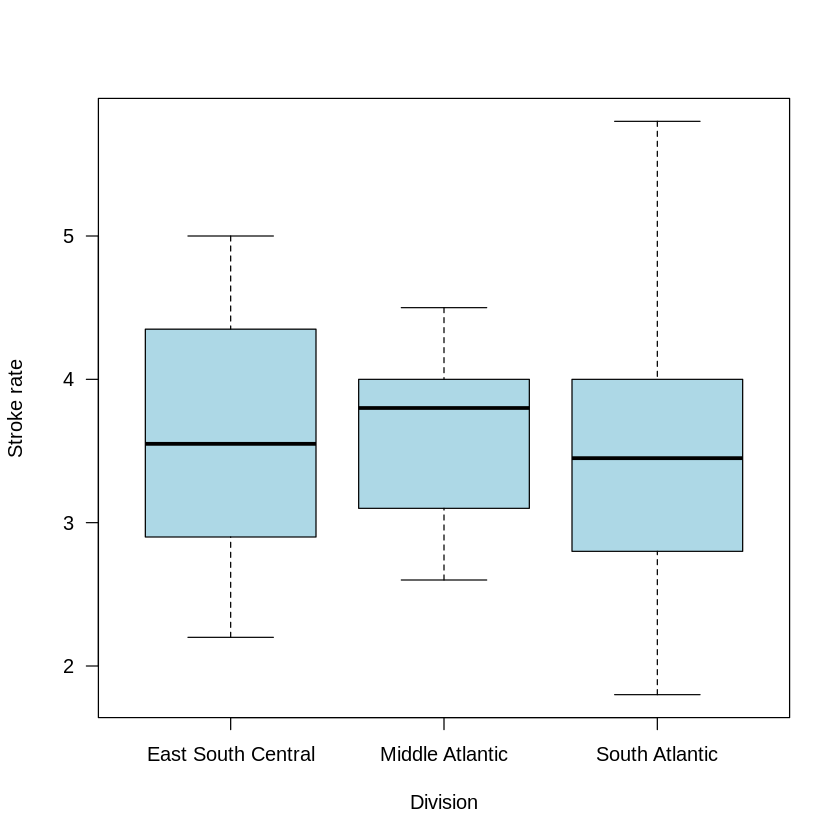

In [ ]:
#draw box plot for 3 divisions with highest average stroke rate
row_<-c("East South Central","Middle Atlantic","South Atlantic")
x<-final_df$Division %in% row_
t<-final_df[x,]
boxplot(t$STROKE_CrudePrev~t$Division,las=1,xlab = 'Division',ylab='Stroke rate',col='lightblue')

Now we would like to look at the correlation between outcome variables and other features in the dataset

In [ ]:
#Get only numeric values
x<-sapply(df3,is.numeric)
df_num<-df3[,x]
df_cor<-cor(df_num)

#Eliminate columns and rows of PlaceFPIS and PAPTEST, which we do not use
col_<-colnames(df_cor)!='PAPTEST_CrudePrev' & colnames(df_cor)!='PlaceFIPS'
row_<-rownames(df_cor)!='PAPTEST_CrudePrev' & rownames(df_cor)!='PlaceFIPS'
df_cor<-as.data.frame(df_cor[row_,col_])
df_cor<-df_cor[order(-df_cor$STROKE_CrudePrev),]
df_cor[abs(df_cor$STROKE_CrudePrev)>0.5,c('STROKE_CrudePrev','BPHIGH_CrudePrev')]


,STROKE_CrudePrev,BPHIGH_CrudePrev
,<dbl>,<dbl>
STROKE_CrudePrev,1.0000000,0.8982887
KIDNEY_CrudePrev,0.9391883,0.8155809
COPD_CrudePrev,0.9035220,0.8269253
BPHIGH_CrudePrev,0.8982887,1.0000000
CHD_CrudePrev,0.8961665,0.8322552
DIABETES_CrudePrev,0.8961045,0.8572805
PHLTH_CrudePrev,0.8739183,0.7446558
TEETHLOST_CrudePrev,0.8324700,0.7131885
LPA_CrudePrev,0.7775682,0.7300726


Just as expected, there exists high correlation between health issues such as Kidney, High Blood pressure and Diabetes with Stroke Rate. 

Regarding unhealthy behaviors, we also find that not having enough leisure time, smoke cigarettes and sleeping < 7 hours also correlate positively with  the dependent variable.

On the other hand, using clinical preventive services and higher rate of visiting dentists move in different direction with STROKE rate. 

Among the demographic variables that we add, rate of black people has positive correlation, while income per capita has negative correlation. These patterns really match with recent statistics about STROKE and are potential independent variables for our models.




In [ ]:
#draw heatmap for variables that have absolute correlation with STROKE > 0.65 (to simply the chart)
name_list<-rownames(df_cor[abs(df_cor$STROKE_CrudePrev)>0.55,])
x<-rownames(df_cor) %in% name_list
y<-colnames(df_cor) %in% name_list

df_stroke<-df_cor[x,y]

In [ ]:
install.packages('corrplot')
library('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



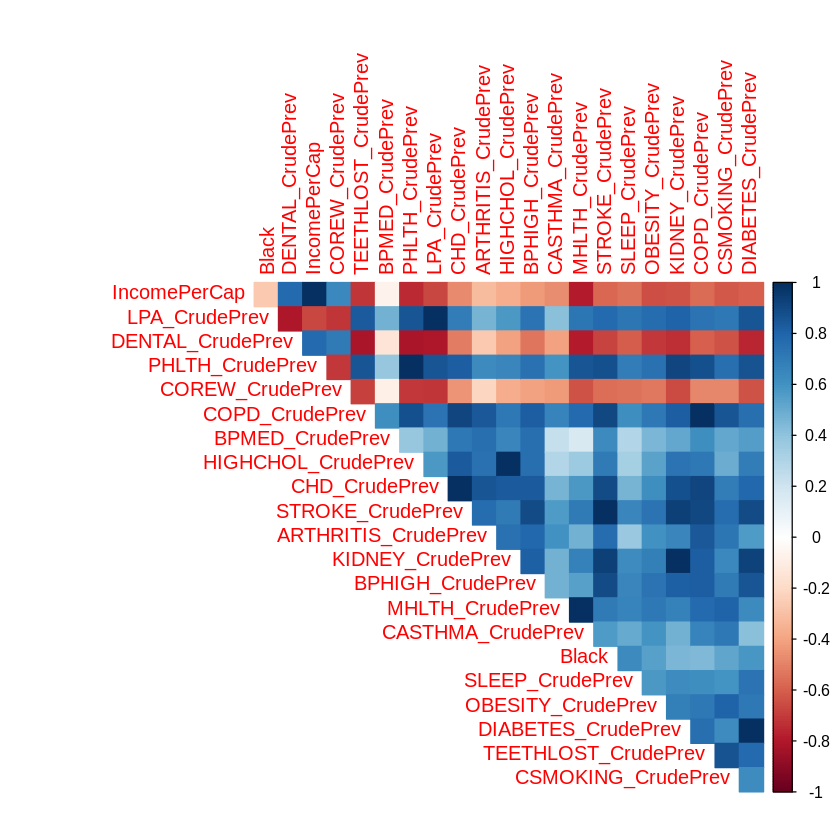

In [ ]:
corrplot(as.matrix(df_stroke),method='color',type='upper',order='hclust',number.cex=2)

Many variables correlate strongly with each other. Hence, we should be prudent at including them in the linear models so as not to result in high collinearity.

In [ ]:
#We want to see the pair plot between outcome variables and health-outcome features
col_list<-c('STROKE_CrudePrev','BPHIGH_CrudePrev','DIABETES_CrudePrev','KIDNEY_CrudePrev','TEETHLOST_CrudePrev','OBESITY_CrudePrev')
to_draw<-final_df[,col_list]


In [ ]:
install.packages('psych')
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



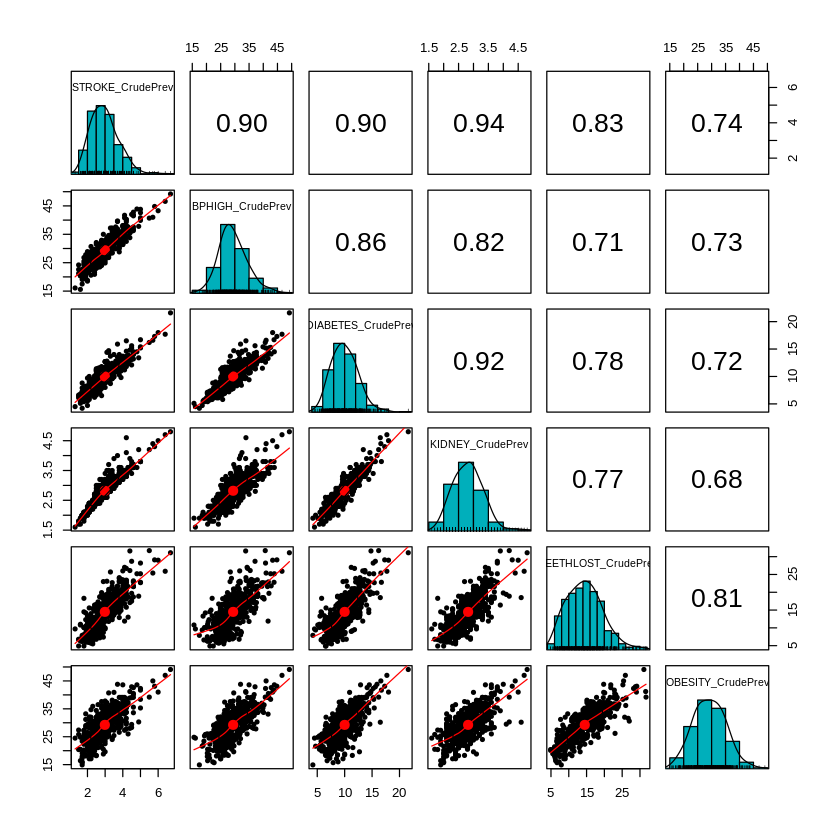

In [ ]:
pairs.panels(to_draw[,], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB", 
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )

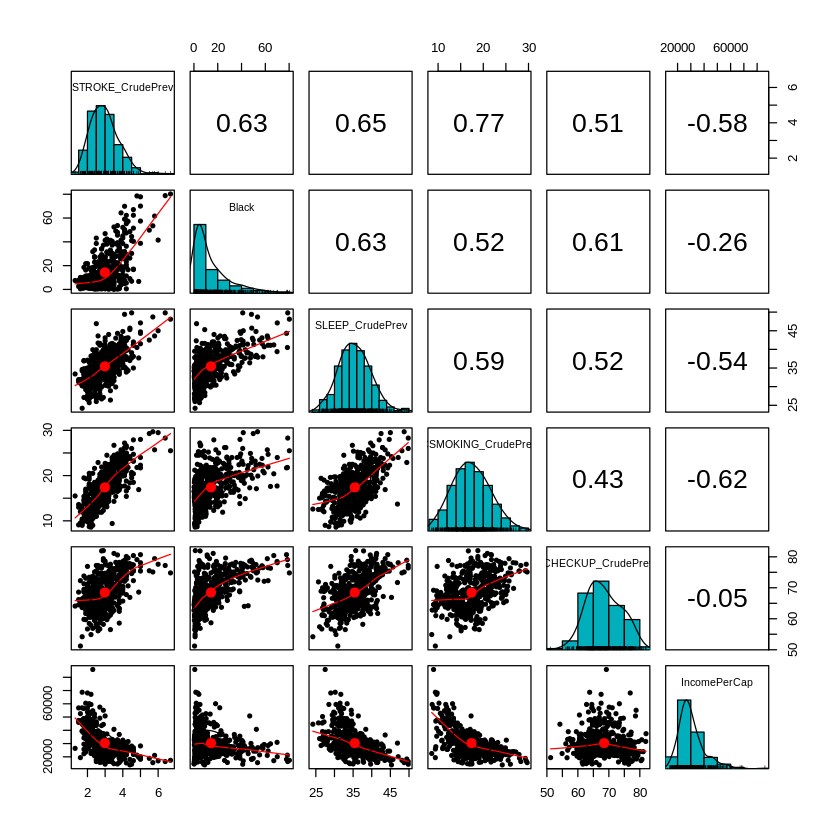

In [ ]:
#We want to see the pair plot between outcome variables and lifestyle features +demographic variables
col_list<-c('STROKE_CrudePrev','Black','SLEEP_CrudePrev','CSMOKING_CrudePrev','CHECKUP_CrudePrev','IncomePerCap')
to_draw<-final_df[,col_list]

pairs.panels(to_draw[,], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB", 
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )

# **Literature Review**
What is stroke? “Stroke is a disease that affects the arteries leading to and within the brain” [1], and “32,000 brain cells per second, about 1.9 million per minute die, during a stroke” [2].That means millions of neuron, namely brain cells are impaired. Once they impaired, information cannot transmit through these building block of brain, which can cause tremendous harm to perception, memory and consciousness.

According to AHA/ASA Policy statement in 2013, “[w]ith the aging population, the prevalence of stroke is projected to increase, which translates to an additional 3.4 million people with stroke in 2030 relative to 2012. By 2030, nearly 4% of the US population is projected to have had a stroke” [3]. That means stroke has positive relationship with age. Stroke is more prevalent among people who are older than “65 years old”, and more interestingly, “[b]y 2030, stroke prevalence is projected to rise the most among white Hispanic men” [3]. This is in the Table 1 of this journal; its change rate is predicted to be 29.3% from 2012 to 2030, which is the highest among the demographic group.

Also, our group look at “Heart Disease and Stroke Map Widget” [4]. We found another interesting fact. The stroke death rate of 35+ years old people is much higher in the southeast of the United States than most other area. More specially, the nation average death rate is 72.6 of 100000, the state whose death rate greater than 80 are Ohio; Oklahoma; Arkansas; Tennessee; North Carolina; South Carolina Georgia; Alabama; Mississippi; Louisiana. They all locate together, which forms a stroke belt. Isn’t that amazing? 

What is more, Oct. 29 is World Stroke Day. A fun fact! This day is set to let people aware of stroke, because “A stroke can happen to anyone, at anytime, anywhere. 1#4 adults will have a stroke in their lifetime. Stroke is a leading cause of death and disability worldwide, but almost all stroke could be prevented” [5]! So, what are the types of stroke? And how to prevent it? And does Coronavirus-19 has influence on that?

The three main types of stroke are: “Ischemic stroke, Hemorrhagic stroke, Transient ischemic attack (a warning or mini-stroke)” [8]. Most strokes (87%) are ischemic strokes. Firstly, we focus on the ischemic strokes. “An ischemic stroke happens when blood flow through the artery that supplies oxygen-rich blood to the brain becomes blocked. Secondly, a hemorrhagic stroke happens when an artery in the brain leaks blood or ruptures (breaks open)” [8]. Thirdly, the transient ischemic attack (TIA) is sometimes called a “mini-stroke.” “It is different from the major types of stroke because blood flow to the brain is blocked for only a short time—usually no more than 5 minutes” [9].

Targeting on preventing these three types of strokes, our group explore if there any treatments to stroke. We find out “Cinepazide” is a new medicine to treat the stroke.  “Cinepazide Maleate (MD-67350) is a piperazine derivative and acts as a weak calcium channel blocker. Cinepazide Maleate is a potent vasodilator and can be used for the research of cerebrovascular diseases, including ischemic stroke, brain infarct et” [6].

Also, our group explored factors that can increase the risk of stroke. These factors are high blood pressure; smoking; diabetes; high blood cholesterol levels; alcoholism; a diet high in fat (particularly saturated) and salt, but low in fiber, fruit and vegetables; lack of regular exercise; obesity. To decrease stroke risk, the risk of these behaviors should be decreased at first [7]. 

We know nowadays cov-19 has been a serious pandemic. So how does it affect stroke? Researchers found that “2.4 percent” of patients hospitalized for COVID-19 had an ischemic stroke—the most common type of stroke, typically caused by a blood clot in the brain. Importantly, most of these stroke patients had existing risk factors. Researchers say “the results suggest that these cerebrovascular events in hospitalized COVID-19 patients are likely tied to existing conditions, and not the sole consequence of the virus” [10]. So, we can conclude that Hospitalized COVID-19 patients have little relationship with stroke.

To sum up, these are our group findings about stroke, it is helpful to following hypothesis testing and model building. 


![Stroke Death Rate per 100000. AgeS 35+](https://www.ahajournals.org/cms/asset/16b46d64-a9a9-4831-a599-df95efc98e44/742fig01.gif)

# **Hypothesis Testing**

## One Sample Testing

In [ ]:
f <- function(x) data.frame(mean = mean(x), sd = sd(x),size=length(x))
summary_table<-do.call(rbind, tapply(final_df$STROKE_CrudePrev, final_df$Division, f))
summary_table

,mean,sd,size
,<dbl>,<dbl>,<int>
East North Central,3.316393,1.1396169,61
East South Central,3.625000,0.8910668,16
Middle Atlantic,3.588000,0.5637080,25
Mountain,2.618000,0.4893519,50
New England,2.965517,0.6872699,29
Pacific,2.640000,0.5315596,145
South Atlantic,3.415385,0.8171978,78
West North Central,2.831250,0.6625647,32
West South Central,2.893750,0.7102146,64


In [ ]:
f <- function(x) data.frame(mean = mean(x), sd = sd(x),size=length(x))
summary_state<-do.call(rbind, tapply(final_df$STROKE_CrudePrev, final_df$StateAbbr, f))
summary_state[which(rownames(summary_state)=='CA'),]

,mean,sd,size
,<dbl>,<dbl>,<int>
CA,2.604959,0.5381839,121


Most of the samples in Pacific came from California, with average stroke rate of 2.6.
We will do a hypothesis testing to test if there is any difference between population average of Cali and 2.64 (the Pacific average rate) at 0.05 significance level

<center> $H_0:\mu = 2.64$<br>
$H_1:\mu\neq 2.64$

To find the value of the test statistic, we use the $t$ distribution:<br>
<center> <center> $t$ = $\frac{\bar{X} - \mu}{s/\sqrt n}$</center>

In [ ]:
X_bar<-summary_state['CA','mean']
sd<-summary_state['CA','sd']
n<-summary_state['CA','size']
mu<-2.64


X_bar
sd
n

[1] 2.604959

[1] 0.5381839

[1] 121

In [ ]:
t_stat<-(X_bar-mu)/(sd/sqrt(n))
t_stat

[1] -0.7162135

In [ ]:
alpha=0.1
crit_value<-qt(df=n-1,alpha/2,lower.tail = F)
c(-crit_value,crit_value)

[1] -1.657651  1.657651

Since t_stat is within the critical region, we fail to reject the null hypothesis and cannot conclude that the population average of stroke rate in California is different from 2.64

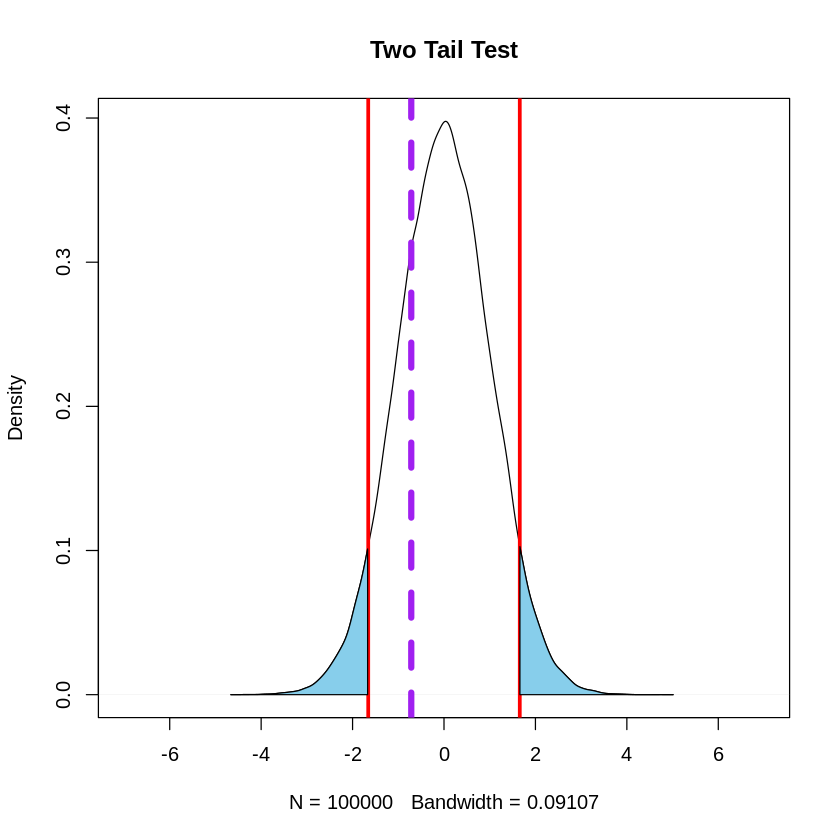

In [ ]:
tmp = rt(100000, df=n-1)
plot(density(tmp), main='Two Tail Test',xlim = c(-7,7))
# add a line on the left tail
abline(v=crit_value, col='red', lwd=3)
# add the shaded polygon to the RIGHT
dens = density(tmp) # store those value
x1 <- min(which(dens$x >= crit_value))
x2 <- max(which(dens$x <= Inf))
with(dens, polygon(x=c(x[c(x1,x1:x2,x2)]), y= c(0, y[x1:x2], 0), col="skyblue"))

# add a line on the left tail
abline(v=-crit_value, col='red', lwd=3)
# add the shaded polygon to the LEFT
dens = density(tmp) # store those value
x1 <- min(which(dens$x >= -Inf))
x2 <- max(which(dens$x <= -crit_value))
with(dens, polygon(x=c(x[c(x1,x1:x2,x2)]), y= c(0, y[x1:x2], 0), col="skyblue"))

# now add our purple line
abline(v=t_stat, lty=2, lwd=5, col='purple')

## Two Sample Testing

Looking at the average stroke rate, we can find that the stroke incidences are highest in South East Region with most states belonging to Stroke Belt.

Now we will do a hypothesis to test if mean of stroke belt proportion in East South Central is higher than East North Central

**Step 1:** State the null hypothesis and the alternate hypothesis 
<center> $H_0$:$\mu_1$ $\leq$ $\mu_2$<br>
$H_1$:$\mu_1$ $>$ $\mu_2$</center>

In which: <br>
$\mu_1$ is the mean of stroke rate in East South Central <br>
$\mu_2$ is the mean of stroke rate in East North Central 


In [ ]:
X1<-summary_table['East South Central','mean']
X2<-summary_table['East North Central','mean']
s1<-summary_table['East South Central','sd']
s2<-summary_table['East North Central','sd']
n1<-summary_table['East South Central','size'] #sample size=number of cities
n2<-summary_table['East North Central','size']

In [ ]:
X1
X2

[1] 3.625

[1] 3.316393

In [ ]:
t_stat<-(X1-X2)/sqrt(s1^2/n1+s2^2/n2)
df<-trunc(((s1^2/n1+s2^2/n2)^2)/((s1^2/n1)^2/(n1-1)+(s2^2/n2)/(n2-1)))
t_stat

[1] 1.158869

In [ ]:
#Critical area
alpha=0.1
crit_value<-qt(df=df,alpha,lower.tail = F)
crit_value

[1] 1.383029

In [ ]:
p_val<-pt(df=df,t_stat,lower.tail = F)
p_val

[1] 0.1381665

Given that t_stat $<$ critical value and p_value $>$ significance value, we fail to reject the null hypothesis and cannot conclude that the mean of stroke rate in East South Central is higher than that in East North Central

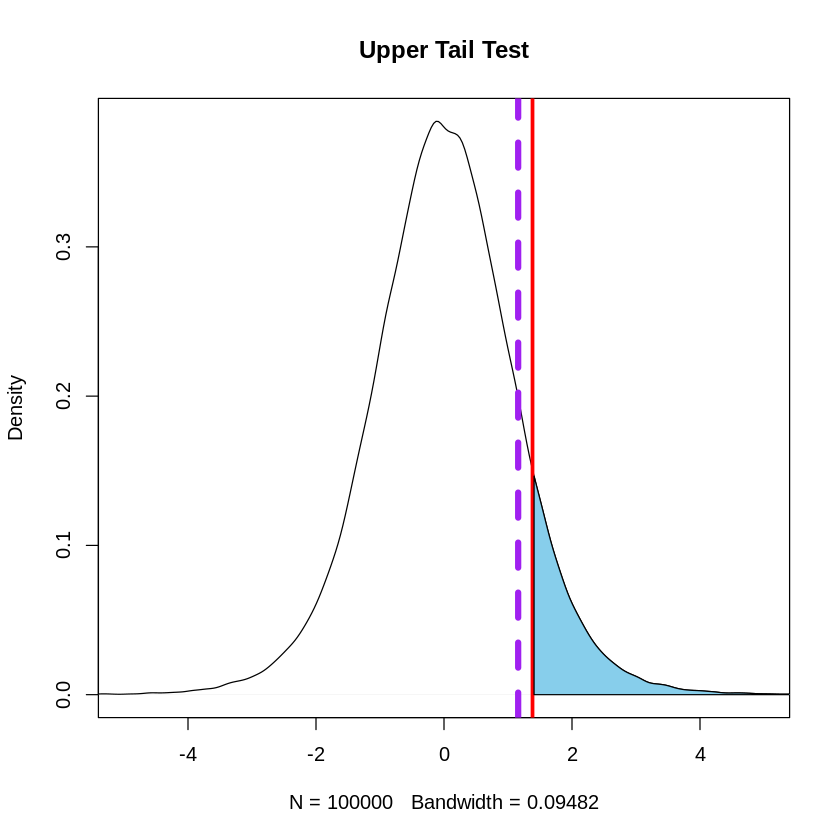

In [ ]:
tmp = rt(100000,df=df)
plot(density(tmp), main='Upper Tail Test',xlim=c(-5,5))
abline(v=crit_value, col='red', lwd=3) # add a xritical value on the left tail
dens = density(tmp) # add the shaded polygon to the right
x1 <- min(which(dens$x >= crit_value))
x2 <- max(which(dens$x <= Inf))
with(dens, polygon(x=c(x[c(x1,x1:x2,x2)]), y= c(0, y[x1:x2], 0), col="skyblue"))

# now add our purple line
abline(v=t_stat, lty=2, lwd=5, col='purple')


# **Modeling**

## Linear-full variables

We are trying to use all variables that make sense to build linear model.<br>
Let's check the distribution of the target varibale before initiating the model.

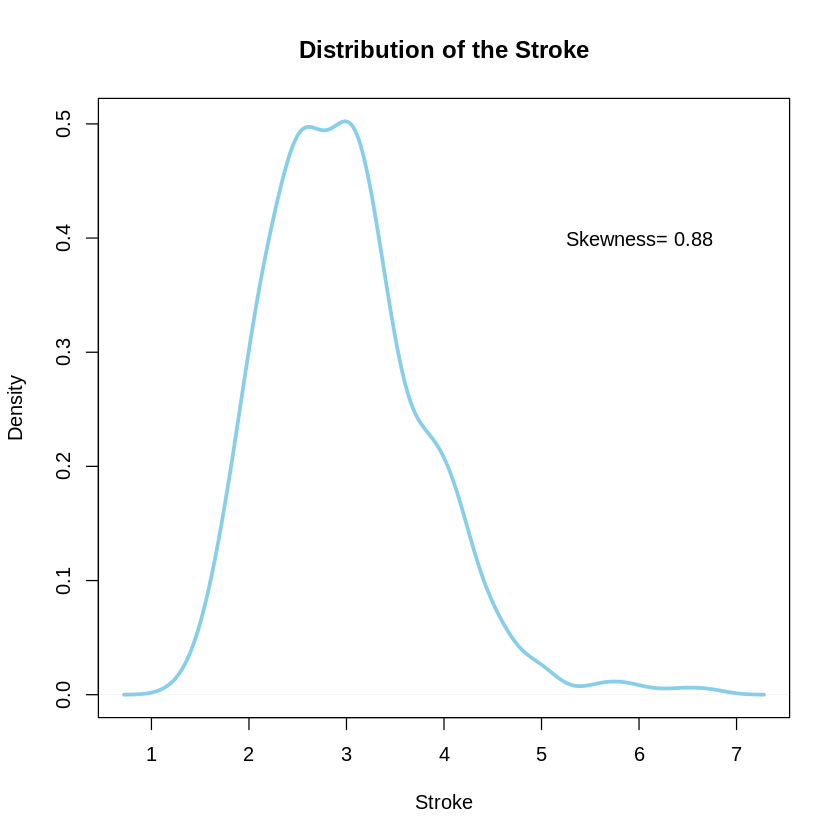

In [ ]:
plot(density(final_df$STROKE_CrudePrev),main='Distribution of the Stroke',xlab='Stroke',col='skyblue',lwd=3)
text(6,0.4,paste("Skewness=",round(skewness(final_df$STROKE_CrudePrev),2)))


As mentioned in EDA, it seems that we need to transfrom the target variable. Let's try ^0.3 transformation on target variable.

In [ ]:
#Use Shapiro Wilk Test to test normality assumption
shapiro.test(final_df$STROKE_CrudePrev)


	Shapiro-Wilk normality test

data:  final_df$STROKE_CrudePrev
W = 0.95862, p-value = 1.226e-10


Since the $H_0$ is that the variable has normal distribution, p_value is too small indicating that the null hypothesis can be rejected. STROKE_CrudePrev does not meet normalization assumption

In [ ]:
#Use Shapiro Wilk Test to choose value for power transformation
p_value<-c()
pow<-seq(0.1,0.5,0.05)
for (i in pow) {
   t=shapiro.test(final_df$STROKE_CrudePrev^i)
   x<-t$p.value
   p_value<-c(p_value,x)
   }
cbind(pow,p_value)
   

pow,p_value
0.10,0.2076062513
0.15,0.1299413335
0.20,0.0695671922
0.25,0.0320261455
0.30,0.0128525436
0.35,0.0045805461
0.40,0.0014791573
0.45,0.0004412446
0.50,0.0001237254


We will choose power transformation at 0.2. With this value, null hypothesis of normalization cannot be rejected at signficance value of 0.05

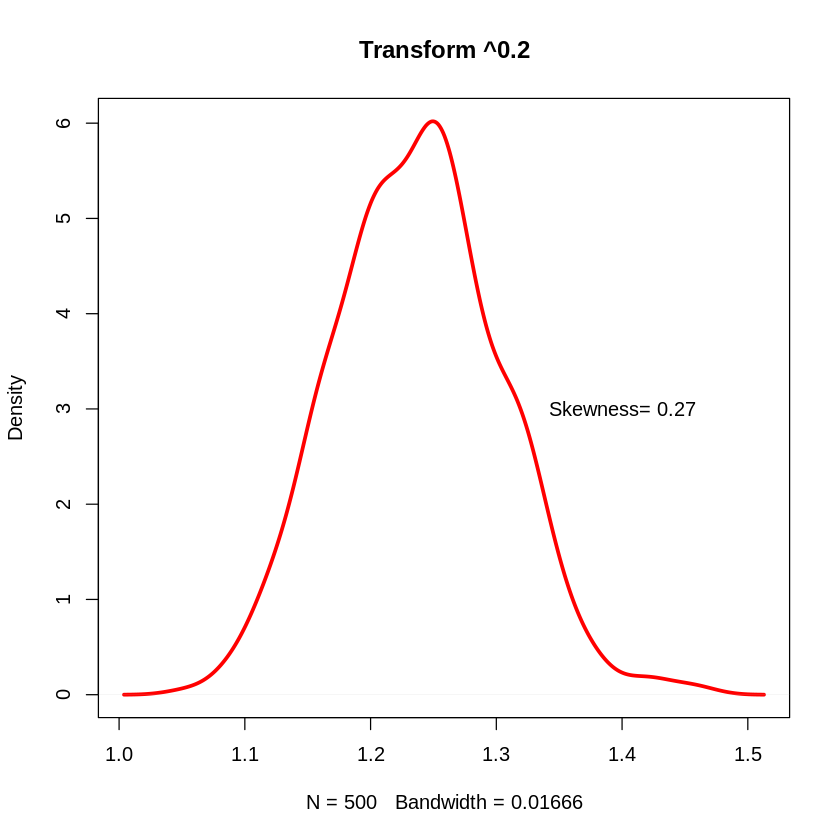

In [ ]:
# try ^0.2 transformation
plot(density(final_df$STROKE_CrudePrev^0.2),
main='Transform ^0.2',
col='red',lwd=3)
text(1.4,3,paste("Skewness=",round(skewness(final_df$STROKE_CrudePrev^0.3),2)))


The transform ^0.2 is good with moderately skewness. We will use STROKE_CrudePrev^0.2 as target variable in th model.

In [ ]:
# store list of selected variable
select_variable <-c('STROKE_CrudePrev','BINGE_CrudePrev','CSMOKING_CrudePrev','LPA_CrudePrev','BPHIGH_CrudePrev',
'SLEEP_CrudePrev','ACCESS2_CrudePrev','CHECKUP_CrudePrev','CHOLSCREEN_CrudePrev','Hispanic','Black',
'DENTAL_CrudePrev','IncomePerCap')
# store used data for modeling
linear_model_df <- final_df[,which(colnames(final_df) %in% select_variable)]
head(linear_model_df,10)

,ACCESS2_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,LPA_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,Hispanic,Black,IncomePerCap
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.5,19.4,26.8,56.9,68.8,18.0,65.2,17.5,31.3,2.3,8.862387,5.254668,38977.12
2,17.0,14.7,42.0,74.6,75.9,20.2,58.7,29.5,39.1,4.5,2.807077,44.500691,25402.89
3,17.9,15.1,40.3,76.5,75.9,21.0,60.6,29.8,38.0,4.2,3.463312,57.997675,26333.89
4,15.3,14.1,36.8,69.6,76.8,18.5,61.2,26.0,37.8,3.4,5.228208,26.601048,33150.38
5,10.3,17.8,30.7,73.0,82.1,14.1,74.5,20.4,32.9,2.2,4.410144,17.163175,42458.92
6,16.4,17.2,32.6,71.6,65.5,20.7,59.6,27.0,39.0,3.1,3.565330,38.064072,24102.72
7,19.2,13.2,43.8,76.9,74.8,22.3,52.6,35.6,41.5,5.0,3.665448,57.454343,28207.60
8,10.6,18.5,24.9,64.7,64.2,20.5,59.5,24.6,34.2,2.1,7.289467,4.732988,30054.80
9,11.9,15.4,37.2,73.5,75.1,19.9,65.9,28.9,36.5,3.4,6.575397,40.413774,32297.42


In [ ]:
str(linear_model_df)

'data.frame':	500 obs. of  13 variables:
 $ ACCESS2_CrudePrev   : num  12.5 17 17.9 15.3 10.3 16.4 19.2 10.6 11.9 15.8 ...
 $ BINGE_CrudePrev     : num  19.4 14.7 15.1 14.1 17.8 17.2 13.2 18.5 15.4 13.7 ...
 $ BPHIGH_CrudePrev    : num  26.8 42 40.3 36.8 30.7 32.6 43.8 24.9 37.2 37.9 ...
 $ CHECKUP_CrudePrev   : num  56.9 74.6 76.5 69.6 73 71.6 76.9 64.7 73.5 70.5 ...
 $ CHOLSCREEN_CrudePrev: num  68.8 75.9 75.9 76.8 82.1 65.5 74.8 64.2 75.1 70.4 ...
 $ CSMOKING_CrudePrev  : num  18 20.2 21 18.5 14.1 20.7 22.3 20.5 19.9 25.4 ...
 $ DENTAL_CrudePrev    : num  65.2 58.7 60.6 61.2 74.5 59.6 52.6 59.5 65.9 54.7 ...
 $ LPA_CrudePrev       : num  17.5 29.5 29.8 26 20.4 27 35.6 24.6 28.9 35.1 ...
 $ SLEEP_CrudePrev     : num  31.3 39.1 38 37.8 32.9 39 41.5 34.2 36.5 35.1 ...
 $ STROKE_CrudePrev    : num  2.3 4.5 4.2 3.4 2.2 3.1 5 2.1 3.4 4 ...
 $ Hispanic            : num  8.86 2.81 3.46 5.23 4.41 ...
 $ Black               : num  5.25 44.5 58 26.6 17.16 ...
 $ IncomePerCap        : num  3897

There are some large numeric value ranges so we need to standardize input (explanatory) variables(except for target variable)

In [ ]:
# use Z-score Scaling to standardize data
dfZ_Score <- as.data.frame(scale(linear_model_df[,which(colnames(linear_model_df)!= 'STROKE_CrudePrev')]))
dfZ_Score

ACCESS2_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,LPA_CrudePrev,SLEEP_CrudePrev,Hispanic,Black,IncomePerCap
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.47119337,0.64961821,-0.5175682480,-2.07574253,-0.7631285,0.147875481,0.2655482,-1.00362762,-0.97069334,-0.74063042,-0.5797190,0.889811017
0.24665150,-1.10127387,2.5124107110,1.09877903,0.5980946,0.684717163,-0.5957608,0.85150661,0.85321494,-1.03496951,1.9273743,-0.509824315
0.39022047,-0.95226177,2.1735314853,1.43954689,0.5980946,0.879932320,-0.3439936,0.89788497,0.59599711,-1.00307095,2.7895813,-0.413829249
-0.02453434,-1.32479200,1.4758389619,0.20202153,0.7706440,0.269884955,-0.2644881,0.31042580,0.54923023,-0.91728215,0.7839189,0.289016946
-0.82213976,0.05356985,0.2598605639,0.81181663,1.7867682,-0.803798409,1.4978826,-0.55530351,-0.59655831,-0.95704695,0.1810138,1.248818561
0.15093885,-0.16994829,0.6386079338,0.56072453,-1.3958096,0.806726636,-0.4765026,0.46502032,0.82983150,-0.99811204,1.5161937,-0.643884391
0.59759788,-1.66006921,2.8712240088,1.51128749,0.3872009,1.197156951,-1.4040662,1.79453319,1.41441749,-0.99324543,2.7548725,-0.220631361
-0.77428343,0.31434101,-0.8963156178,-0.67680082,-1.6450477,0.757922847,-0.4897536,0.09399347,-0.29257359,-0.81708760,-0.6130447,-0.030167182
-0.56690602,-0.84050270,1.5555752503,0.90149238,0.4447173,0.611511479,0.3583045,0.75874990,0.24524551,-0.85179740,1.6662961,0.201068483


In [ ]:
# add target variable to data dfZ_Score
dfZ_Score$STROKE_CrudePrev=linear_model_df$STROKE_CrudePrev

In [ ]:
# Model building
linear_model <- lm(STROKE_CrudePrev^0.2 ~.,data = dfZ_Score)
summary(linear_model)


Call:
lm(formula = STROKE_CrudePrev^0.2 ~ ., data = dfZ_Score)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.059850 -0.015548  0.001129  0.014679  0.073714 

Coefficients:
                       Estimate Std. Error  t value Pr(>|t|)    
(Intercept)           1.2374881  0.0010250 1207.355  < 2e-16 ***
ACCESS2_CrudePrev    -0.0085919  0.0024103   -3.565 0.000400 ***
BINGE_CrudePrev      -0.0018078  0.0014640   -1.235 0.217501    
BPHIGH_CrudePrev      0.0444593  0.0027174   16.361  < 2e-16 ***
CHECKUP_CrudePrev     0.0005178  0.0022314    0.232 0.816603    
CHOLSCREEN_CrudePrev  0.0009035  0.0022117    0.409 0.683070    
CSMOKING_CrudePrev    0.0094577  0.0027615    3.425 0.000667 ***
DENTAL_CrudePrev     -0.0121011  0.0028110   -4.305 2.02e-05 ***
LPA_CrudePrev         0.0040930  0.0034939    1.171 0.241977    
SLEEP_CrudePrev      -0.0079272  0.0020053   -3.953 8.86e-05 ***
Hispanic              0.0057489  0.0022838    2.517 0.012148 *  
Black                 0.001

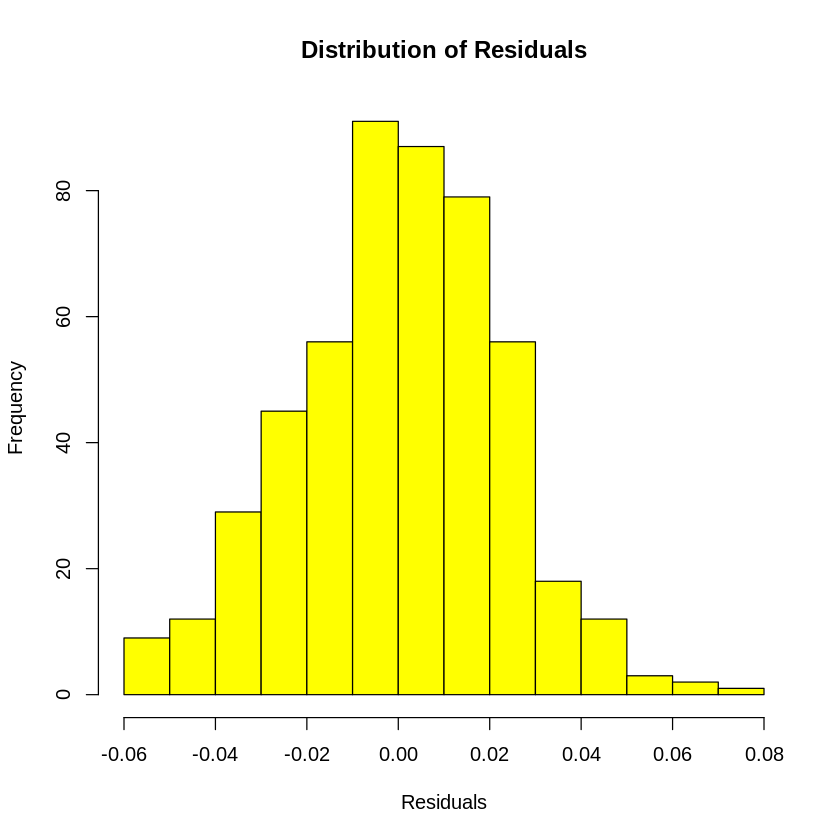

In [ ]:
hist(linear_model$residuals,main = 'Distribution of Residuals', xlab = 'Residuals',col='yellow')

[1] -0.09063143

[1] 0.1807478


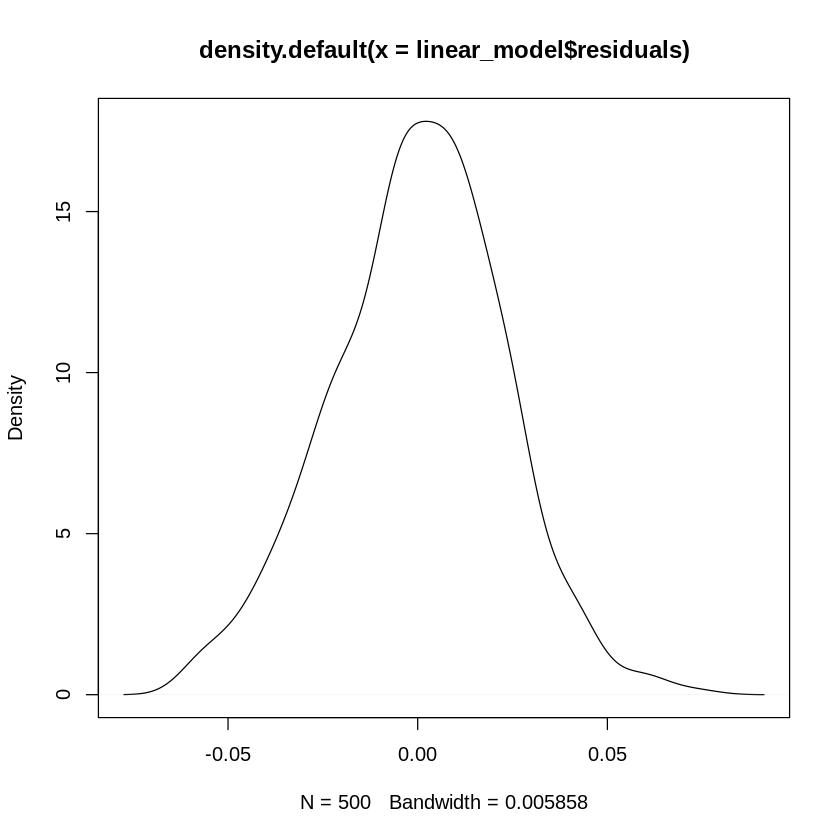

In [ ]:
plot(density(linear_model$residuals))
skew(linear_model$residuals)
t=shapiro.test(linear_model$residuals)$p.value
print(t)

Because we use STROKE_CrudePrev^0.2 as Y in the linear model, so we need to restore the value of predict value. The real predict value is equal to (original predict value)^(10/2) 

In [ ]:
# store the predict_value of STROKE_CrudePrev
predict_value <- linear_model$fitted.values^(10/2)

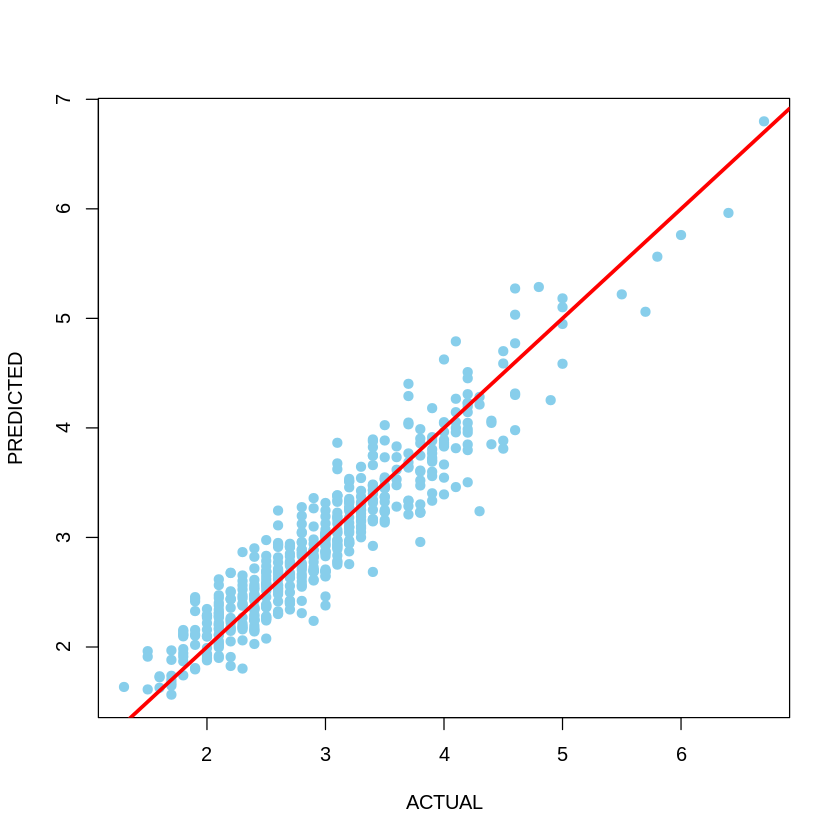

In [ ]:
# make a plot of actual vs pred
plot(x=final_df$STROKE_CrudePrev, # actual data
     y=predict_value, #predict value
     xlab='ACTUAL',
     ylab='PREDICTED',
     pch=19,
     col='skyblue',)
abline(0,1,col='red',lwd=3)

In [ ]:
# use the Metrics package to get some quantitative error metrics
install.packages('Metrics')
library(Metrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# calculate Root Mean Square Error
myRMSE <- rmse(final_df$STROKE_CrudePrev, # actual
               predict_value) # predict
myRMSE

[1] 0.2698607

In [ ]:
# calculate Mean Absolute Percentage Error
myMAPE <- mape(final_df$STROKE_CrudePrev, # actual
               predict_value) # predict
myMAPE

[1] 0.0733333

In [ ]:
AIC(linear_model)

[1] -2342.033

## Linear-reduced variables

Step-Wise Linear Regression

In [ ]:
fit.full <- lm(STROKE_CrudePrev^0.2 ~.,data = dfZ_Score)
summary(fit.full)


Call:
lm(formula = STROKE_CrudePrev^0.2 ~ ., data = dfZ_Score)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.059850 -0.015548  0.001129  0.014679  0.073714 

Coefficients:
                       Estimate Std. Error  t value Pr(>|t|)    
(Intercept)           1.2374881  0.0010250 1207.355  < 2e-16 ***
ACCESS2_CrudePrev    -0.0085919  0.0024103   -3.565 0.000400 ***
BINGE_CrudePrev      -0.0018078  0.0014640   -1.235 0.217501    
BPHIGH_CrudePrev      0.0444593  0.0027174   16.361  < 2e-16 ***
CHECKUP_CrudePrev     0.0005178  0.0022314    0.232 0.816603    
CHOLSCREEN_CrudePrev  0.0009035  0.0022117    0.409 0.683070    
CSMOKING_CrudePrev    0.0094577  0.0027615    3.425 0.000667 ***
DENTAL_CrudePrev     -0.0121011  0.0028110   -4.305 2.02e-05 ***
LPA_CrudePrev         0.0040930  0.0034939    1.171 0.241977    
SLEEP_CrudePrev      -0.0079272  0.0020053   -3.953 8.86e-05 ***
Hispanic              0.0057489  0.0022838    2.517 0.012148 *  
Black                 0.001

In [ ]:
# install the package
install.packages('olsrr')
library(olsrr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# perform the backwards stepwise regression
k <- ols_step_backward_p(fit.full)

In [ ]:
k$model


Call:
lm(formula = paste(response, "~", paste(preds, collapse = " + ")), 
    data = l)

Coefficients:
       (Intercept)   ACCESS2_CrudePrev    BPHIGH_CrudePrev  CSMOKING_CrudePrev  
          1.237488           -0.008086            0.046732            0.007407  
  DENTAL_CrudePrev       LPA_CrudePrev     SLEEP_CrudePrev            Hispanic  
         -0.012250            0.004829           -0.006683            0.004475  
      IncomePerCap  
         -0.009376  


In [ ]:
backwardStepModel <- lm(STROKE_CrudePrev^0.2~ ACCESS2_CrudePrev+BPHIGH_CrudePrev+CSMOKING_CrudePrev+DENTAL_CrudePrev+LPA_CrudePrev+SLEEP_CrudePrev+Hispanic+IncomePerCap,data = dfZ_Score)

In [ ]:
summary(backwardStepModel)


Call:
lm(formula = STROKE_CrudePrev^0.2 ~ ACCESS2_CrudePrev + BPHIGH_CrudePrev + 
    CSMOKING_CrudePrev + DENTAL_CrudePrev + LPA_CrudePrev + SLEEP_CrudePrev + 
    Hispanic + IncomePerCap, data = dfZ_Score)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.060352 -0.014598  0.001551  0.015081  0.072950 

Coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)         1.237488   0.001023 1209.535  < 2e-16 ***
ACCESS2_CrudePrev  -0.008086   0.002276   -3.553 0.000418 ***
BPHIGH_CrudePrev    0.046732   0.001849   25.278  < 2e-16 ***
CSMOKING_CrudePrev  0.007407   0.002335    3.173 0.001605 ** 
DENTAL_CrudePrev   -0.012250   0.002406   -5.092 5.05e-07 ***
LPA_CrudePrev       0.004829   0.002903    1.663 0.096868 .  
SLEEP_CrudePrev    -0.006683   0.001662   -4.022 6.68e-05 ***
Hispanic            0.004475   0.001844    2.427 0.015580 *  
IncomePerCap       -0.009376   0.001805   -5.195 3.01e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.0

In [ ]:
# store the predict_value of STROKE_CrudePrev
predict_value2 <- backwardStepModel$fitted.values^(10/2)

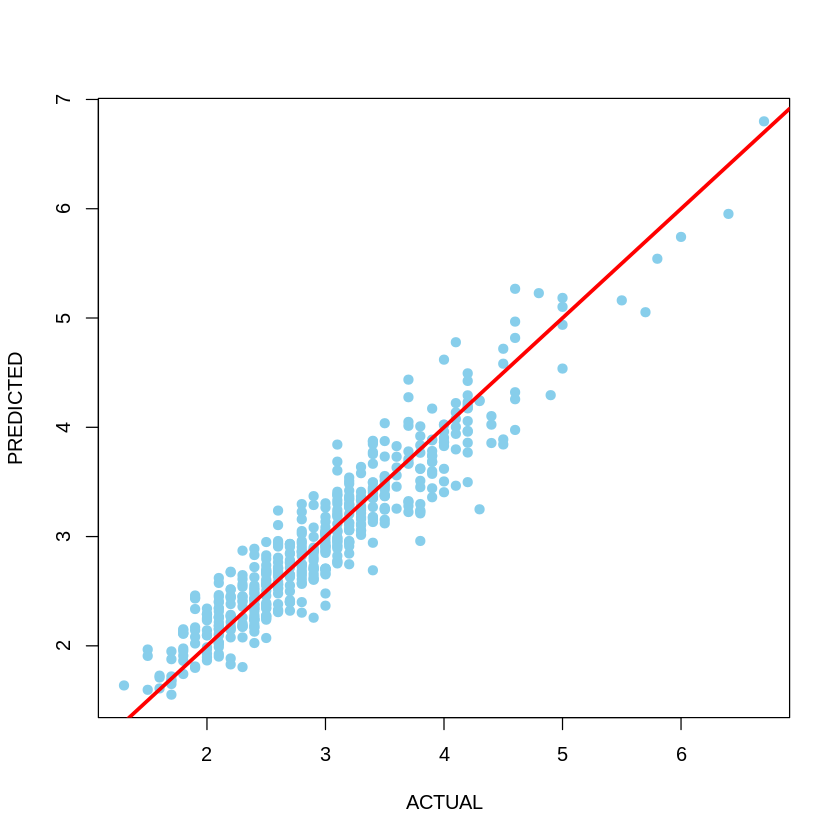

In [ ]:
# make a plot of actual vs pred
plot(x=final_df$STROKE_CrudePrev, # actual data
     y=predict_value2, #predict value
     xlab='ACTUAL',
     ylab='PREDICTED',
     pch=19,
     col='skyblue',)
abline(0,1,col='red',lwd=3)

In [ ]:
# calculate Root Mean Square Error
myRMSE <- rmse(final_df$STROKE_CrudePrev, # actual
               predict_value2) # predict
myRMSE

[1] 0.2702519

In [ ]:
# calculate Mean Absolute Percentage Error
myMAPE <- mape(final_df$STROKE_CrudePrev, # actual
               predict_value2) # predict
myMAPE

[1] 0.07335887

## Logistics-full variables 

In [ ]:
#store median value
thres<-median(final_df$STROKE_CrudePrev)
thres

[1] 2.9

In [ ]:
#Create a feature called class as target variable
convert_value<-function(x) {if (x>thres){x=1}else {x=0}}
final_df$class<-lapply(final_df$STROKE_CrudePrev,FUN=convert_value)
final_df$class<-as.numeric(final_df$class) #convert from list to numeric value

In [ ]:
 #cross-check data
 final_df[c(1:10),which(colnames(final_df) %in% c('class','STROKE_CrudePrev'))]


,STROKE_CrudePrev,class
,<dbl>,<dbl>
1,2.3,0
2,4.5,1
3,4.2,1
4,3.4,1
5,2.2,0
6,3.1,1
7,5.0,1
8,2.1,0
9,3.4,1


In [ ]:
#check the proportion of class 0 and 1. The ratio should be 50:50
table(final_df$class)


  0   1 
257 243 

In [ ]:
#Store list of variables
select<-c('class','BPHIGH_CrudePrev','DIABETES_CrudePrev','KIDNEY_CrudePrev','CSMOKING_CrudePrev','TEETHLOST_CrudePrev','CHD_CrudePrev','LPA_CrudePrev','SLEEP_CrudePrev',
'CHECKUP_CrudePrev','BINGE_CrudePrev','COREW_CrudePrev','CHECKUP_CrudePrev','Black','IncomePerCap','DENTAL_CrudePrev','Hispanic')
#Store data to use for modelling
model_df<-final_df[,which(colnames(final_df) %in% select)]
head(model_df,10)


,BINGE_CrudePrev,BPHIGH_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,SLEEP_CrudePrev,TEETHLOST_CrudePrev,Hispanic,Black,IncomePerCap,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19.4,26.8,4.5,56.9,33.3,18.0,65.2,7.6,2.2,17.5,31.3,12.9,8.862387,5.254668,38977.12,0
2,14.7,42.0,7.7,74.6,30.7,20.2,58.7,15.2,3.4,29.5,39.1,19.7,2.807077,44.500691,25402.89,1
3,15.1,40.3,6.8,76.5,31.0,21.0,60.6,13.7,3.3,29.8,38.0,18.1,3.463312,57.997675,26333.89,1
4,14.1,36.8,6.7,69.6,39.5,18.5,61.2,12.2,3.0,26.0,37.8,14.2,5.228208,26.601048,33150.38,1
5,17.8,30.7,5.2,73.0,38.6,14.1,74.5,8.3,2.3,20.4,32.9,8.3,4.410144,17.163175,42458.92,0
6,17.2,32.6,5.2,71.6,31.7,20.7,59.6,10.3,2.6,27.0,39.0,18.9,3.565330,38.064072,24102.72,1
7,13.2,43.8,7.5,76.9,26.0,22.3,52.6,16.7,3.8,35.6,41.5,22.8,3.665448,57.454343,28207.60,1
8,18.5,24.9,4.6,64.7,31.4,20.5,59.5,6.6,2.1,24.6,34.2,15.6,7.289467,4.732988,30054.80,0
9,15.4,37.2,6.2,73.5,31.4,19.9,65.9,11.4,3.0,28.9,36.5,15.3,6.575397,40.413774,32297.42,1


Before fitting models, we split current dataset into train and test set. Thus we can run the model on the train part and validate its performance on the test set. 

After selecting the best possible model with valid features, we can fit on the whole dataset.


In [ ]:
install.packages('caret')
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
set.seed(12345)
trainIndex <- createDataPartition(model_df$class, p = .85, #split 85% for training data and 15% for testing data
                                  list = FALSE, 
                                  times = 1)

train<-model_df[trainIndex,]
test<-model_df[-trainIndex,]

In [ ]:
#check the size of each dataset
dim(train)
dim(test)

[1] 425  16

[1] 75 16

In [ ]:
#check the balanced of train dataset
table(train$class)


  0   1 
223 202 

In [ ]:
#Fit the model
fit1 <- glm(train$class ~., family='binomial', data=train)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [ ]:
#Summarize model fit results
summary(fit1)


Call:
glm(formula = train$class ~ ., family = "binomial", data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.57862  -0.00029   0.00000   0.00029   2.69181  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.071e+02  3.144e+01  -3.408 0.000655 ***
BINGE_CrudePrev      7.031e-01  2.784e-01   2.526 0.011538 *  
BPHIGH_CrudePrev    -7.006e-01  4.030e-01  -1.738 0.082153 .  
CHD_CrudePrev        2.855e+00  1.837e+00   1.554 0.120124    
CHECKUP_CrudePrev   -2.079e-01  1.625e-01  -1.280 0.200695    
COREW_CrudePrev      3.094e-02  1.770e-01   0.175 0.861239    
CSMOKING_CrudePrev  -3.357e-01  3.638e-01  -0.923 0.356092    
DENTAL_CrudePrev     1.058e-01  1.813e-01   0.583 0.559689    
DIABETES_CrudePrev   3.217e+00  1.249e+00   2.576 0.010008 *  
KIDNEY_CrudePrev     2.937e+01  7.334e+00   4.004 6.22e-05 ***
LPA_CrudePrev        2.497e-02  1.879e-01   0.133 0.894299    
SLEEP_CrudePrev     -8.059e-02  

In [ ]:
#Make prediction on test data
test$Probability=predict(fit1,test,type='response')
head(test,10)

,BINGE_CrudePrev,BPHIGH_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,SLEEP_CrudePrev,TEETHLOST_CrudePrev,Hispanic,Black,IncomePerCap,class,Probability
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,14.1,36.8,6.7,69.6,39.5,18.5,61.2,12.2,3.0,26.0,37.8,14.2,5.228208,26.601048,33150.38,1,1.000000e+00
11,14.4,33.9,6.6,69.7,26.8,21.6,58.1,9.8,2.8,29.3,32.4,18.0,5.361339,15.969793,25860.77,1,9.921551e-01
20,16.2,31.0,6.6,68.9,36.0,15.6,69.1,9.6,3.1,20.9,34.2,9.7,17.508526,5.174595,28254.49,1,9.991824e-01
22,16.6,29.4,6.4,66.5,31.6,17.4,64.1,9.6,3.2,23.4,35.5,13.2,26.827355,3.268277,26451.31,1,9.998974e-01
26,16.3,25.2,4.9,63.8,30.2,14.2,60.4,10.0,2.7,21.7,34.0,12.3,51.834199,2.157459,26079.69,0,1.989964e-06
28,17.7,27.0,5.1,63.1,32.6,14.2,68.7,8.9,2.6,18.6,33.5,12.0,29.590736,2.887570,30370.21,0,5.982936e-06
30,16.9,20.3,3.7,63.8,36.6,9.4,75.4,6.9,2.0,15.8,30.2,6.3,17.320283,1.570933,68706.11,0,2.220446e-16
33,16.2,26.5,4.8,61.6,24.5,17.0,46.4,11.7,3.2,29.2,39.7,18.0,87.966557,8.108109,14487.98,1,3.374364e-01
43,16.5,25.5,5.2,60.4,24.0,16.7,52.4,10.7,3.0,28.1,35.2,16.6,76.803000,1.311627,19401.96,0,1.482665e-03


In [ ]:
#We will apply threshold >=0.5 to be classified as 1.

test$Pred<-1*(test$Probability>=0.5)
head(test,5)

,BINGE_CrudePrev,BPHIGH_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,SLEEP_CrudePrev,TEETHLOST_CrudePrev,Hispanic,Black,IncomePerCap,class,Probability,Pred
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,14.1,36.8,6.7,69.6,39.5,18.5,61.2,12.2,3.0,26.0,37.8,14.2,5.228208,26.601048,33150.38,1,1.000000e+00,1
11,14.4,33.9,6.6,69.7,26.8,21.6,58.1,9.8,2.8,29.3,32.4,18.0,5.361339,15.969793,25860.77,1,9.921551e-01,1
20,16.2,31.0,6.6,68.9,36.0,15.6,69.1,9.6,3.1,20.9,34.2,9.7,17.508526,5.174595,28254.49,1,9.991824e-01,1
22,16.6,29.4,6.4,66.5,31.6,17.4,64.1,9.6,3.2,23.4,35.5,13.2,26.827355,3.268277,26451.31,1,9.998974e-01,1
26,16.3,25.2,4.9,63.8,30.2,14.2,60.4,10.0,2.7,21.7,34.0,12.3,51.834199,2.157459,26079.69,0,1.989964e-06,0


In [ ]:
#import package for confusion matrix
install.packages('e1071')
library(e1071)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
confusionMatrix(table(test$Pred,test$class),positive = "1")


Confusion Matrix and Statistics

   
     0  1
  0 32  2
  1  2 39
                                         
               Accuracy : 0.9467         
                 95% CI : (0.869, 0.9853)
    No Information Rate : 0.5467         
    P-Value [Acc > NIR] : 1.313e-14      
                                         
                  Kappa : 0.8924         
                                         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 0.9512         
            Specificity : 0.9412         
         Pos Pred Value : 0.9512         
         Neg Pred Value : 0.9412         
             Prevalence : 0.5467         
         Detection Rate : 0.5200         
   Detection Prevalence : 0.5467         
      Balanced Accuracy : 0.9462         
                                         
       'Positive' Class : 1              
                                         

We see that most metrics are very satisfactory:


*   Accuracy is 0.95
*   Recall (sensitity) is 0.95
*   Precision (Pos Pred Value) is 0.95
*   False Positive Rate (Specificity) is 0.94









In [ ]:
#Let's calculate AUC
library("pROC")
auc(test$class,test$Pred)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9462

## Logistics-reduced variables 

Step-Wise Logistic Regression

We will do a backward step-wise regression to reduce unnecessary variables.

In [ ]:
# here is to define the full model
full.model <- glm(class ~., data = train, family = binomial)
coef(full.model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


(Intercept)     BINGE_CrudePrev    BPHIGH_CrudePrev       CHD_CrudePrev 
      -1.071307e+02        7.031474e-01       -7.005600e-01        2.854991e+00 
  CHECKUP_CrudePrev     COREW_CrudePrev  CSMOKING_CrudePrev    DENTAL_CrudePrev 
      -2.078678e-01        3.094043e-02       -3.357369e-01        1.057682e-01 
 DIABETES_CrudePrev    KIDNEY_CrudePrev       LPA_CrudePrev     SLEEP_CrudePrev 
       3.216510e+00        2.936514e+01        2.496863e-02       -8.059365e-02 
TEETHLOST_CrudePrev            Hispanic               Black        IncomePerCap 
       6.404120e-01       -3.131758e-01        2.714468e-01       -1.751849e-04

In [ ]:
# run backwards stepwise regression 
library(MASS)
step.model1 =stepAIC(full.model,
                      trace= TRUE)
coef(full.model) 

Start:  AIC=78.83
class ~ BINGE_CrudePrev + BPHIGH_CrudePrev + CHD_CrudePrev + 
    CHECKUP_CrudePrev + COREW_CrudePrev + CSMOKING_CrudePrev + 
    DENTAL_CrudePrev + DIABETES_CrudePrev + KIDNEY_CrudePrev + 
    LPA_CrudePrev + SLEEP_CrudePrev + TEETHLOST_CrudePrev + Hispanic + 
    Black + IncomePerCap



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                      Df Deviance     AIC
- LPA_CrudePrev        1   46.849  76.849
- COREW_CrudePrev      1   46.862  76.862
- SLEEP_CrudePrev      1   46.970  76.970
- DENTAL_CrudePrev     1   47.177  77.177
- CSMOKING_CrudePrev   1   47.745  77.745
- CHECKUP_CrudePrev    1   48.539  78.539
<none>                     46.832  78.832
- IncomePerCap         1   49.404  79.404
- CHD_CrudePrev        1   49.455  79.455
- BPHIGH_CrudePrev     1   50.108  80.108
- TEETHLOST_CrudePrev  1   52.664  82.664
- BINGE_CrudePrev      1   55.902  85.902
- Black                1   56.993  86.993
- DIABETES_CrudePrev   1   57.096  87.096
- Hispanic             1   75.950 105.950
- KIDNEY_CrudePrev     1   91.437 121.437


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=76.85
class ~ BINGE_CrudePrev + BPHIGH_CrudePrev + CHD_CrudePrev + 
    CHECKUP_CrudePrev + COREW_CrudePrev + CSMOKING_CrudePrev + 
    DENTAL_CrudePrev + DIABETES_CrudePrev + KIDNEY_CrudePrev + 
    SLEEP_CrudePrev + TEETHLOST_CrudePrev + Hispanic + Black + 
    IncomePerCap



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                      Df Deviance     AIC
- COREW_CrudePrev      1   46.872  74.872
- SLEEP_CrudePrev      1   46.977  74.977
- DENTAL_CrudePrev     1   47.178  75.178
- CSMOKING_CrudePrev   1   47.746  75.746
- CHECKUP_CrudePrev    1   48.651  76.651
<none>                     46.849  76.849
- IncomePerCap         1   49.418  77.418
- CHD_CrudePrev        1   49.564  77.564
- BPHIGH_CrudePrev     1   50.123  78.123
- TEETHLOST_CrudePrev  1   52.713  80.713
- BINGE_CrudePrev      1   56.171  84.171
- Black                1   57.011  85.011
- DIABETES_CrudePrev   1   57.271  85.271
- Hispanic             1   78.011 106.011
- KIDNEY_CrudePrev     1   91.590 119.590


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=74.87
class ~ BINGE_CrudePrev + BPHIGH_CrudePrev + CHD_CrudePrev + 
    CHECKUP_CrudePrev + CSMOKING_CrudePrev + DENTAL_CrudePrev + 
    DIABETES_CrudePrev + KIDNEY_CrudePrev + SLEEP_CrudePrev + 
    TEETHLOST_CrudePrev + Hispanic + Black + IncomePerCap



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                      Df Deviance     AIC
- SLEEP_CrudePrev      1   47.012  73.012
- DENTAL_CrudePrev     1   47.180  73.180
- CSMOKING_CrudePrev   1   47.859  73.859
- CHECKUP_CrudePrev    1   48.771  74.771
<none>                     46.872  74.872
- IncomePerCap         1   49.433  75.433
- CHD_CrudePrev        1   49.898  75.898
- BPHIGH_CrudePrev     1   50.125  76.125
- TEETHLOST_CrudePrev  1   53.223  79.223
- BINGE_CrudePrev      1   56.249  82.249
- DIABETES_CrudePrev   1   57.340  83.340
- Black                1   57.400  83.400
- Hispanic             1   83.165 109.165
- KIDNEY_CrudePrev     1   92.840 118.840


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=73.01
class ~ BINGE_CrudePrev + BPHIGH_CrudePrev + CHD_CrudePrev + 
    CHECKUP_CrudePrev + CSMOKING_CrudePrev + DENTAL_CrudePrev + 
    DIABETES_CrudePrev + KIDNEY_CrudePrev + TEETHLOST_CrudePrev + 
    Hispanic + Black + IncomePerCap



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                      Df Deviance     AIC
- DENTAL_CrudePrev     1   47.320  71.320
- CSMOKING_CrudePrev   1   48.330  72.330
<none>                     47.012  73.012
- IncomePerCap         1   49.442  73.442
- CHECKUP_CrudePrev    1   50.468  74.468
- BPHIGH_CrudePrev     1   51.382  75.382
- CHD_CrudePrev        1   53.441  77.441
- TEETHLOST_CrudePrev  1   54.188  78.188
- BINGE_CrudePrev      1   56.417  80.417
- DIABETES_CrudePrev   1   57.348  81.348
- Black                1   59.408  83.408
- Hispanic             1   83.182 107.182
- KIDNEY_CrudePrev     1   93.425 117.425


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=71.32
class ~ BINGE_CrudePrev + BPHIGH_CrudePrev + CHD_CrudePrev + 
    CHECKUP_CrudePrev + CSMOKING_CrudePrev + DIABETES_CrudePrev + 
    KIDNEY_CrudePrev + TEETHLOST_CrudePrev + Hispanic + Black + 
    IncomePerCap



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                      Df Deviance     AIC
- CSMOKING_CrudePrev   1   49.294  71.294
<none>                     47.320  71.320
- IncomePerCap         1   49.586  71.586
- CHECKUP_CrudePrev    1   50.468  72.468
- BPHIGH_CrudePrev     1   51.426  73.426
- CHD_CrudePrev        1   54.712  76.712
- TEETHLOST_CrudePrev  1   54.725  76.725
- BINGE_CrudePrev      1   56.451  78.451
- DIABETES_CrudePrev   1   59.190  81.190
- Black                1   60.774  82.774
- Hispanic             1   85.029 107.029
- KIDNEY_CrudePrev     1   93.432 115.432


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=71.29
class ~ BINGE_CrudePrev + BPHIGH_CrudePrev + CHD_CrudePrev + 
    CHECKUP_CrudePrev + DIABETES_CrudePrev + KIDNEY_CrudePrev + 
    TEETHLOST_CrudePrev + Hispanic + Black + IncomePerCap



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                      Df Deviance     AIC
- IncomePerCap         1   50.273  70.273
<none>                     49.294  71.294
- CHECKUP_CrudePrev    1   52.282  72.282
- BPHIGH_CrudePrev     1   53.015  73.015
- CHD_CrudePrev        1   54.993  74.993
- TEETHLOST_CrudePrev  1   55.034  75.034
- BINGE_CrudePrev      1   56.523  76.523
- DIABETES_CrudePrev   1   59.813  79.813
- Black                1   61.085  81.085
- Hispanic             1   85.530 105.530
- KIDNEY_CrudePrev     1   93.765 113.765


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=70.27
class ~ BINGE_CrudePrev + BPHIGH_CrudePrev + CHD_CrudePrev + 
    CHECKUP_CrudePrev + DIABETES_CrudePrev + KIDNEY_CrudePrev + 
    TEETHLOST_CrudePrev + Hispanic + Black



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                      Df Deviance     AIC
<none>                     50.273  70.273
- BPHIGH_CrudePrev     1   53.307  71.307
- CHECKUP_CrudePrev    1   54.544  72.544
- CHD_CrudePrev        1   55.195  73.195
- BINGE_CrudePrev      1   57.330  75.330
- DIABETES_CrudePrev   1   60.982  78.982
- Black                1   61.087  79.087
- TEETHLOST_CrudePrev  1   66.262  84.262
- Hispanic             1   85.631 103.631
- KIDNEY_CrudePrev     1   95.810 113.810


(Intercept)     BINGE_CrudePrev    BPHIGH_CrudePrev       CHD_CrudePrev 
      -1.071307e+02        7.031474e-01       -7.005600e-01        2.854991e+00 
  CHECKUP_CrudePrev     COREW_CrudePrev  CSMOKING_CrudePrev    DENTAL_CrudePrev 
      -2.078678e-01        3.094043e-02       -3.357369e-01        1.057682e-01 
 DIABETES_CrudePrev    KIDNEY_CrudePrev       LPA_CrudePrev     SLEEP_CrudePrev 
       3.216510e+00        2.936514e+01        2.496863e-02       -8.059365e-02 
TEETHLOST_CrudePrev            Hispanic               Black        IncomePerCap 
       6.404120e-01       -3.131758e-01        2.714468e-01       -1.751849e-04

In [ ]:
AIC(full.model)
AIC(step.model1) # lower AIC means better

[1] 78.83165

[1] 70.27285

In [ ]:
# a summary of reduced model 
summary(step.model1)


Call:
glm(formula = class ~ BINGE_CrudePrev + BPHIGH_CrudePrev + CHD_CrudePrev + 
    CHECKUP_CrudePrev + DIABETES_CrudePrev + KIDNEY_CrudePrev + 
    TEETHLOST_CrudePrev + Hispanic + Black, family = binomial, 
    data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.41453  -0.00115   0.00000   0.00074   2.61508  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -92.03089   20.33524  -4.526 6.02e-06 ***
BINGE_CrudePrev       0.47842    0.19786   2.418 0.015605 *  
BPHIGH_CrudePrev     -0.53156    0.31231  -1.702 0.088754 .  
CHD_CrudePrev         2.39468    1.19955   1.996 0.045900 *  
CHECKUP_CrudePrev    -0.23605    0.11949  -1.976 0.048210 *  
DIABETES_CrudePrev    2.50101    0.93119   2.686 0.007235 ** 
KIDNEY_CrudePrev     26.37772    6.31200   4.179 2.93e-05 ***
TEETHLOST_CrudePrev   0.49084    0.14454   3.396 0.000684 ***
Hispanic             -0.26696    0.06911  -3.863 0.000112 ***
Black      

In [ ]:
test$Probability=predict(step.model1,test,type='response')
test$Pred<-1*(test$Probability>=0.5)

In [ ]:
confusionMatrix(table(test$Pred,test$class),positive = "1")

Confusion Matrix and Statistics

   
     0  1
  0 33  2
  1  1 39
                                          
               Accuracy : 0.96            
                 95% CI : (0.8875, 0.9917)
    No Information Rate : 0.5467          
    P-Value [Acc > NIR] : 8.638e-16       
                                          
                  Kappa : 0.9195          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9512          
            Specificity : 0.9706          
         Pos Pred Value : 0.9750          
         Neg Pred Value : 0.9429          
             Prevalence : 0.5467          
         Detection Rate : 0.5200          
   Detection Prevalence : 0.5333          
      Balanced Accuracy : 0.9609          
                                          
       'Positive' Class : 1               
                                          

In [ ]:
auc(test$class,test$Pred)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9609

using stepwise to do reduced logistics-variables:


*   Accuracy is 0.96
*   Recall (sensitity) is 0.95
*   Precision (Pos Pred Value) is 0.98
*   False Positive Rate (Specificity) is 0.97

In [ ]:
#here is for full model
test$Probability=predict(full.model,test,type='response')
test$Pred<-1*(test$Probability>=0.5)

In [ ]:
confusionMatrix(table(test$Pred,test$class),positive = "1")

Confusion Matrix and Statistics

   
     0  1
  0 32  2
  1  2 39
                                         
               Accuracy : 0.9467         
                 95% CI : (0.869, 0.9853)
    No Information Rate : 0.5467         
    P-Value [Acc > NIR] : 1.313e-14      
                                         
                  Kappa : 0.8924         
                                         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 0.9512         
            Specificity : 0.9412         
         Pos Pred Value : 0.9512         
         Neg Pred Value : 0.9412         
             Prevalence : 0.5467         
         Detection Rate : 0.5200         
   Detection Prevalence : 0.5467         
      Balanced Accuracy : 0.9462         
                                         
       'Positive' Class : 1              
                                         

In [ ]:
auc(test$class,test$Pred)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9462

full model of logistics-variables:


*   Accuracy is 0.95
*   Recall (sensitity) is 0.95
*   Precision (Pos Pred Value) is 0.95
*   False Positive Rate (Specificity) is 0.94

We see that reduced model yields slightly better outcome than full model in most metrics, including Accuracy (0.96 vs. 0.95) and AUC

Let's fit the model on train dataset to compare the results

In [ ]:
train$Probability=predict(step.model1,train,type='response')
train$Pred<-1*(train$Probability>=0.5)

In [ ]:
confusionMatrix(table(train$Pred,train$class),positive = "1")

Confusion Matrix and Statistics

   
      0   1
  0 219   5
  1   4 197
                                          
               Accuracy : 0.9788          
                 95% CI : (0.9602, 0.9903)
    No Information Rate : 0.5247          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9575          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9752          
            Specificity : 0.9821          
         Pos Pred Value : 0.9801          
         Neg Pred Value : 0.9777          
             Prevalence : 0.4753          
         Detection Rate : 0.4635          
   Detection Prevalence : 0.4729          
      Balanced Accuracy : 0.9787          
                                          
       'Positive' Class : 1               
                                          

In [ ]:
auc(train$class,train$Pred)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9787

We can see that AuC and error metrics do not reduce much from train data fitting to test data, thus the model is less likely to overfit.

Next, we will use the selected variables to fit the whole dataset

In [ ]:
logit_model<-glm(data=model_df,formula = class ~ BINGE_CrudePrev + BPHIGH_CrudePrev + CHECKUP_CrudePrev + 
    DIABETES_CrudePrev + KIDNEY_CrudePrev + TEETHLOST_CrudePrev + Hispanic+
     Black,family='binomial')
summary(logit_model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = class ~ BINGE_CrudePrev + BPHIGH_CrudePrev + CHECKUP_CrudePrev + 
    DIABETES_CrudePrev + KIDNEY_CrudePrev + TEETHLOST_CrudePrev + 
    Hispanic + Black, family = "binomial", data = model_df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.23549  -0.00451   0.00000   0.00322   2.30183  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -88.52936   15.51861  -5.705 1.17e-08 ***
BINGE_CrudePrev       0.55648    0.18444   3.017  0.00255 ** 
BPHIGH_CrudePrev     -0.05129    0.23292  -0.220  0.82572    
CHECKUP_CrudePrev    -0.10280    0.09592  -1.072  0.28385    
DIABETES_CrudePrev    1.94837    0.73571   2.648  0.00809 ** 
KIDNEY_CrudePrev     22.84941    4.34634   5.257 1.46e-07 ***
TEETHLOST_CrudePrev   0.55465    0.12921   4.293 1.77e-05 ***
Hispanic             -0.21118    0.04461  -4.734 2.20e-06 ***
Black                 0.07604    0.04150   1.832  0.06695 .  
---
Signif. codes:  0 ‘***’

In [ ]:
model_df$Probability=predict(logit_model,model_df,type='response')
model_df$Pred<-1*(model_df$Probability>=0.5)

In [ ]:
confusionMatrix(table(model_df$Pred,model_df$class),positive = "1")

Confusion Matrix and Statistics

   
      0   1
  0 249   9
  1   8 234
                                          
               Accuracy : 0.966           
                 95% CI : (0.9461, 0.9801)
    No Information Rate : 0.514           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9319          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9630          
            Specificity : 0.9689          
         Pos Pred Value : 0.9669          
         Neg Pred Value : 0.9651          
             Prevalence : 0.4860          
         Detection Rate : 0.4680          
   Detection Prevalence : 0.4840          
      Balanced Accuracy : 0.9659          
                                          
       'Positive' Class : 1               
                                          

In [ ]:
model_df<-cbind(final_df[,which(colnames(final_df) %in% c('StateAbbr','Division','PlaceName'))],model_df)

In [ ]:
model_df[which(model_df$class != model_df$Pred),]

,StateAbbr,PlaceName,Division,BINGE_CrudePrev,BPHIGH_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,⋯,KIDNEY_CrudePrev,LPA_CrudePrev,SLEEP_CrudePrev,TEETHLOST_CrudePrev,Hispanic,Black,IncomePerCap,class,Probability,Pred
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16,AZ,Phoenix,Mountain,16.5,27.5,5.5,64.3,30.3,18.6,59.3,⋯,3.1,25.6,37.3,14.3,42.126548,6.5021580,26850.67,0,0.88981897,1
44,CA,Glendale,Pacific,16.6,28.3,5.7,67.3,36.6,13.3,66.4,⋯,2.9,18.6,34.6,10.0,18.150052,1.5496145,33007.40,1,0.25777049,0
95,CA,Rialto,Pacific,17.1,29.2,5.1,63.8,25.2,16.3,54.1,⋯,3.0,25.7,40.2,18.9,71.276722,10.3406057,18819.99,1,0.38158965,0
105,CA,Turlock,Pacific,18.3,28.5,5.9,63.9,30.6,15.3,63.0,⋯,2.9,23.5,35.1,14.9,37.753726,1.6766461,25779.96,1,0.35430564,0
141,CA,Escondido,Pacific,19.6,26.9,5.5,62.9,29.7,15.8,61.6,⋯,2.9,22.4,34.5,13.7,47.428572,1.9333402,27067.07,1,0.07070692,0
214,HI,Honolulu,Pacific,17.7,31.5,5.0,71.7,30.4,13.7,72.3,⋯,2.9,21.6,46.9,6.8,9.601872,2.1795419,30347.37,0,0.63990789,1
227,IL,Joliet,East North Central,20.3,28.4,5.3,66.5,26.2,20.5,58.2,⋯,2.7,27.9,34.8,18.7,27.416656,15.5429943,26485.80,0,0.60854879,1
232,IL,Cicero,East North Central,21.2,27.4,5.3,63.2,20.4,19.5,46.1,⋯,3.2,34.4,36.3,19.9,88.922119,3.1283824,16054.64,0,0.91780941,1
270,MA,Lowell,New England,16.4,28.3,5.6,72.6,26.1,20.1,57.1,⋯,2.7,26.7,36.7,23.0,20.303622,6.6937475,23768.33,0,0.77780119,1


# **Discussion/Analysis**

Since linear-reduced variables model and logistics-reduced variables model perform better, we will use these two models and analyse.

## Linear-reduced variables



In [ ]:
# store predictions into final_df
final_df$linear_predict <- predict_value2
final_df

StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,⋯,Hispanic,White,Black,IncomePerCap,Num_Hospitals,HospitalPerCap,Region,Division,class,linear_predict
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
AK,Anchorage,203000,291826,12.5,19.8,19.4,26.8,63.7,5.1,⋯,8.862387,59.19051,5.2546681,38977.12,9,3.017856e-05,West,Pacific,0,2.539931
AL,Mobile,150000,195111,17.0,32.1,14.7,42.0,79.3,6.3,⋯,2.807077,48.81498,44.5006909,25402.89,7,2.934727e-05,South,East South Central,1,4.718495
AL,Montgomery,151000,205764,17.9,29.4,15.1,40.3,78.9,5.9,⋯,3.463312,34.14197,57.9976746,26333.89,9,4.159984e-05,South,East South Central,1,4.424261
AL,Huntsville,137000,180105,15.3,29.2,14.1,36.8,79.0,6.4,⋯,5.228208,62.55102,26.6010480,33150.38,7,2.649297e-05,South,East South Central,1,3.754639
AL,Hoover,135896,81619,10.3,24.0,17.8,30.7,77.7,6.6,⋯,4.410144,71.51250,17.1631749,42458.92,9,5.683182e-05,South,East South Central,0,2.672815
AL,Tuscaloosa,177256,90468,16.4,24.1,17.2,32.6,73.6,4.6,⋯,3.565330,54.98336,38.0640719,24102.72,6,4.433377e-05,South,East South Central,1,3.385190
AL,Birmingham,107000,212237,19.2,29.3,13.2,43.8,81.3,5.6,⋯,3.665448,36.03889,57.4543434,28207.60,14,4.245628e-05,South,East South Central,1,5.183988
AR,Fayetteville,523290,73580,10.6,17.4,18.5,24.9,68.8,4.6,⋯,7.289467,80.60180,4.7329879,30054.80,11,9.040923e-05,South,West South Central,0,2.620772
AR,Little Rock,541000,193524,11.9,26.0,15.4,37.2,77.9,6.1,⋯,6.575397,47.52756,40.4137741,32297.42,14,6.649094e-05,South,West South Central,1,3.876164


[1] -0.09063143

[1] 0.1807478


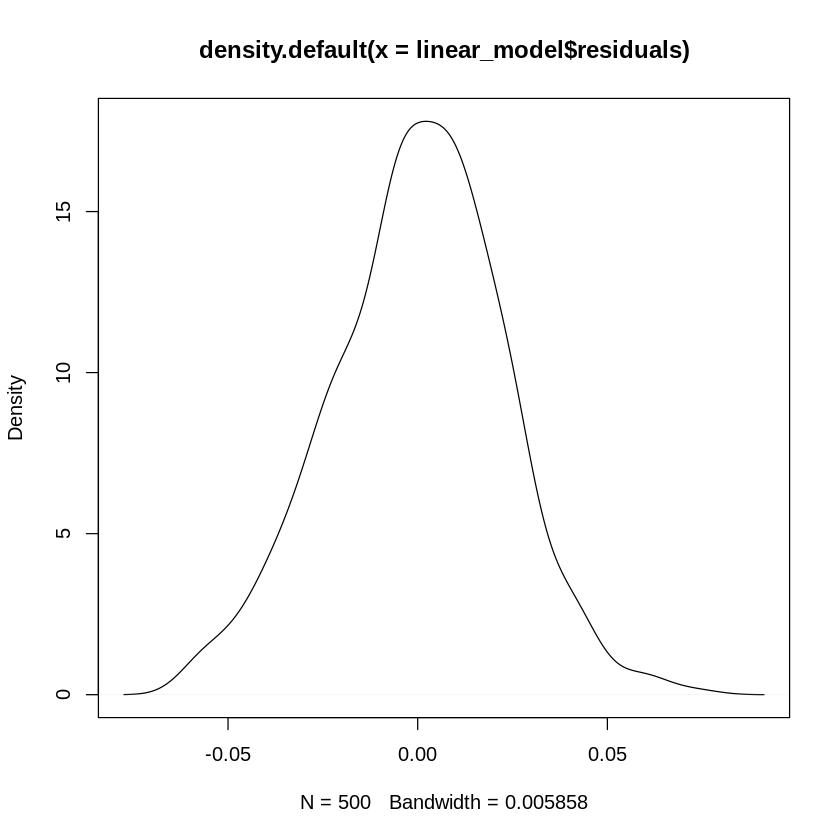

In [ ]:
plot(density(linear_model$residuals))
skew(linear_model$residuals)
t=shapiro.test(linear_model$residuals)$p.value
print(t)

Our residuals look pretty symmetrical around 0,suggesting that our model fits the data well.

The residuals also meet the assumption of normal distribution using Shapiro test.

In [ ]:
summary(backwardStepModel)


Call:
lm(formula = STROKE_CrudePrev^0.2 ~ ACCESS2_CrudePrev + BPHIGH_CrudePrev + 
    CSMOKING_CrudePrev + DENTAL_CrudePrev + LPA_CrudePrev + SLEEP_CrudePrev + 
    Hispanic + IncomePerCap, data = dfZ_Score)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.060352 -0.014598  0.001551  0.015081  0.072950 

Coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)         1.237488   0.001023 1209.535  < 2e-16 ***
ACCESS2_CrudePrev  -0.008086   0.002276   -3.553 0.000418 ***
BPHIGH_CrudePrev    0.046732   0.001849   25.278  < 2e-16 ***
CSMOKING_CrudePrev  0.007407   0.002335    3.173 0.001605 ** 
DENTAL_CrudePrev   -0.012250   0.002406   -5.092 5.05e-07 ***
LPA_CrudePrev       0.004829   0.002903    1.663 0.096868 .  
SLEEP_CrudePrev    -0.006683   0.001662   -4.022 6.68e-05 ***
Hispanic            0.004475   0.001844    2.427 0.015580 *  
IncomePerCap       -0.009376   0.001805   -5.195 3.01e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.0

Our final linear model can therefore be written as following:

From the above formular, we can see that BPHIGH, CSMOKING and Hispanic have positive correlation with Stroke. ACCESS2, DENTAL, SLEEP and IncomePerCap have negative correlation with Stroke.

Because MAPE(mean absolute percentage error) is a percentage of error relative to the actual value, we decide to use MAPE to evaluate the performance of the model by states.

In [ ]:
# MAPE = (actual-predict)/actual
# calculate MAPE
M <- abs((final_df$STROKE_CrudePrev-final_df$linear_predict)/final_df$STROKE_CrudePrev)

In [ ]:
# store the value of MAPE
final_df$MAPE <- M

In [ ]:
# Summary Table showing statistics of MAPE for divisions
f <- function(x) data.frame(mean = mean(x), median=median(x), sd = sd(x),size=length(x))
summary_table<-do.call(rbind, tapply(final_df$MAPE, final_df$Division, f))
summary_table

,mean,median,sd,size
,<dbl>,<dbl>,<dbl>,<int>
East North Central,0.05929739,0.03550020,0.06351595,61
East South Central,0.12615114,0.10288830,0.06627344,16
Middle Atlantic,0.07207440,0.07373586,0.04007955,25
Mountain,0.07264467,0.06703282,0.04333265,50
New England,0.05258743,0.05241970,0.03724430,29
Pacific,0.06050004,0.04979180,0.04439605,145
South Atlantic,0.07925989,0.07285410,0.05839810,78
West North Central,0.06969298,0.05013393,0.05606952,32
West South Central,0.10780931,0.10472955,0.08357822,64


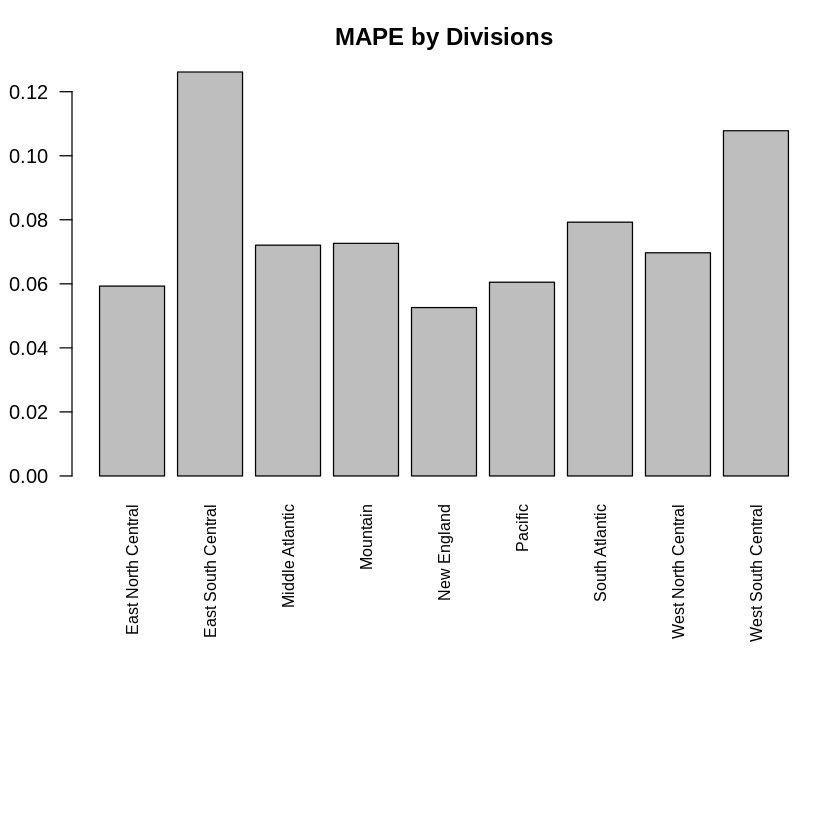

In [ ]:
#plot the mean of MAPE
par(mar=c(15, 3, 3, 1))
barplot(summary_table$mean, main="MAPE by Divisions", names.arg=rownames(summary_table),horiz=F, cex.names=0.8,las=2)

From the table and barplot above, we can see that East South Central and West South Central have high MAPE, which means the performance of model in these two divisions is worse than others.<br>
The values of MAPE in most divisions are less than 8%, thus the model performs relatively well.

## Logistics-reduced variables


In [ ]:
# the coefficients from logistics reduced variables model 
(coef(step.model1))

(Intercept)     BINGE_CrudePrev    BPHIGH_CrudePrev       CHD_CrudePrev 
        -92.0308927           0.4784195          -0.5315572           2.3946793 
  CHECKUP_CrudePrev  DIABETES_CrudePrev    KIDNEY_CrudePrev TEETHLOST_CrudePrev 
         -0.2360497           2.5010076          26.3777191           0.4908441 
           Hispanic               Black 
         -0.2669566           0.2199120

In [ ]:
# now exponentiate the cofficients 
exp(coef(step.model1))

(Intercept)     BINGE_CrudePrev    BPHIGH_CrudePrev       CHD_CrudePrev 
       1.075205e-40        1.613522e+00        5.876891e-01        1.096468e+01 
  CHECKUP_CrudePrev  DIABETES_CrudePrev    KIDNEY_CrudePrev TEETHLOST_CrudePrev 
       7.897414e-01        1.219478e+01        2.855603e+11        1.633695e+00 
           Hispanic               Black 
       7.657063e-01        1.245967e+00

**Let's interpret what we see from this model**<br>
From coeffcients of variables, we conclude that there are positive relationships between 'BINGE','DIABETES','KINDEY','TEETHLOST','Black' and stroke.<br>

 there are also existing  negative relationships between 'BPHIGH','CHECKUP','Hispanic'  and stroke.<br>

 For example,the cofficient estimate of variable 'BINGE_CrudePrev' is $\beta$=0.5565, which is positive. It means that an person who increase in binge is associated with increase in the probaility of being stroke. <br>

The coefficient for 'BINGE_CrudePrev' is 0.5565, it indicates that one unit increase in the binge will incrase the odds of being stroke positively by exp(0.5565)=1.7445 times.<br>

As a result, a one-unit increase in 'BINGE_CrudePrev' will make a person 74.45% more likely of being storke. 


In [ ]:
table(model_df$Division,model_df$Pred) # here are prediction from model of being stroke 

                    
                       0   1
  East North Central  22  39
  East South Central   4  12
  Middle Atlantic      4  21
  Mountain            38  12
  New England         15  14
  Pacific            106  39
  South Atlantic      23  55
  West North Central  18  14
  West South Central  28  36

In [ ]:
table(model_df$Division,model_df$class) #here is actul number of being stroke

                    
                       0   1
  East North Central  24  37
  East South Central   4  12
  Middle Atlantic      3  22
  Mountain            37  13
  New England         16  13
  Pacific            104  41
  South Atlantic      23  55
  West North Central  17  15
  West South Central  29  35

In [ ]:
f <- function(x) data.frame(mean = mean(x), median=median(x), sd = sd(x),size=length(x))
summary_table<-do.call(rbind, tapply(model_df$class, final_df$Division, f))
summary_table   # mean of stroke in regions of actul 

,mean,median,sd,size
,<dbl>,<dbl>,<dbl>,<int>
East North Central,0.6065574,1,0.4925677,61
East South Central,0.7500000,1,0.4472136,16
Middle Atlantic,0.8800000,1,0.3316625,25
Mountain,0.2600000,0,0.4430875,50
New England,0.4482759,0,0.5061202,29
Pacific,0.2827586,0,0.4519011,145
South Atlantic,0.7051282,1,0.4589365,78
West North Central,0.4687500,0,0.5070073,32
West South Central,0.5468750,1,0.5017331,64


In [ ]:
f <- function(x) data.frame(mean = mean(x), median=median(x), sd = sd(x),size=length(x))
summary_table<-do.call(rbind, tapply(model_df$Pred, final_df$Division, f))
summary_table  # mean of stroke in regions of predction

,mean,median,sd,size
,<dbl>,<dbl>,<dbl>,<int>
East North Central,0.6393443,1,0.4841758,61
East South Central,0.7500000,1,0.4472136,16
Middle Atlantic,0.8400000,1,0.3741657,25
Mountain,0.2400000,0,0.4314191,50
New England,0.4827586,0,0.5085476,29
Pacific,0.2689655,0,0.4449590,145
South Atlantic,0.7051282,1,0.4589365,78
West North Central,0.4375000,0,0.5040161,32
West South Central,0.5625000,1,0.5000000,64


The highest stroke rate are East South Central and Middle Altanic from the model and actual dataset.<br>
The model performs excellent in South Atlantic and East Sounth Central since it has the same mean of actual and model. Middle Atlantic, New England and West North Central perfroms bad, which showing 0.03 difference between the mean of actual and model.<br>
In general, the model performs well through comparing the mean of being stroke from model and actul. 

# **Conclusion**

For the project, we loaded three more datasets combining with 500 cities dataset to explore the relationships between the stroke and predictors in the United States. We did hypothesis testing, exploration dataset, linear regression modeling, and logistic regression modeling better to understand the performance of stroke in each region.<br>

Our model told us that high blood pressure, diabetes, and chronic kidney disease could increase the possibility of being a stroke. Some unhealthy lifestyle also tends to make people get a stroke in the future, such as binge, smoking, no exercise time, and lack of sleep.<br>

Interestingly, the predictor of the numbers of hospitals didn’t contribute to our models. We think the accessibility of healthcare could be one of the reasons in affecting the stroke rate. As a result, in the next step, we probably need to find a valid healthcare dataset to measure the stroke rate in different regions. Besides, lack of health insurance also increases the probability of being a stroke. From this point of view, the healthcare system in the USA is not perfect. The government still needs to put efforts to improve healthcare efficiency and making an acceptable medical policy. It’s a long way to go through.<br>

 Overall, our models from linear and logistic doing an excellent job in predicting being stroke. Some regions such as East South Central and West South Central from linear regression, Middle Atlantic, New England, and West North Central from logistic regression are not doing well. To improve the accuracy of performance in those regions, we need to explore more details in those regions about lifestyle, eating habits, exercise, and other illnesses leading to a stroke.<br>

Thanks to this project, we learned a lot about R and how to collaborate with group members in different time zones. 
Thank you, Professor Dave for delivering excellent content for us. We appreciate it! Enjoy your winter break and stay healthy.<br>




# **Contribution**
**Haojing Wang**<br>
Responsible for literature review, and hypothesis testing. <br>
**Khoi Nguyen**<br>
Responsible for joinging data, Exploratory Data Analysis, modeling,checking and modifying code.<br>
**Yuting Hou**<br>
Responsible for loading dataset, modeling and discussion parts. Also help the group organize the process of project.<br>
**Yuxin Weng**<br>
Responsible for hypothesis testing, modeling and discussion.<br>
**Yuanzhe Xu**<br>
Responsible for literature review, modeling and conclusion.

# **References**
1.	https://www.stroke.org/en/about-stroke
2.	https://www.sciencedaily.com/releases/2014/10/141013152620.htm
3.	https://www.ahajournals.org/doi/pdf/10.1161/str.0b013e31829734f2
4.	https://www.cdc.gov/dhdsp/maps/hds-widget.htm
5.	https://www.world-stroke.org/world-stroke-day-campaign
6.	https://pubmed.ncbi.nlm.nih.gov/540882/
7.	https://pubmed.ncbi.nlm.nih.gov/540882/https://www.betterhealth.vic.gov.au/health/ConditionsAndTreatments/stroke-risk-factors-and-prevention
8.	https://www.cdc.gov/stroke/types_of_stroke.htm
9.	https://www.stroke.org/en/about-stroke/types-of-stroke/tia-transient-ischemic-attack
10.	https://medicalxpress.com/news/2020-07-hospitalized-covid-patients.html
